In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE,Isomap
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans,DBSCAN,HDBSCAN
import clustpy
import torch
from clustpy import deep
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error
from sklearn.metrics import silhouette_score
import jupyter_capture_output
from sklearn.metrics import silhouette_score

Jupyter Capture Output v0.0.11


In [4]:
!uv pip install -U torch scikit-learn clustpy[full] seaborn matplotlib pandas yellowbrick jupyter_capture_output openpyxl

Resolved 87 packages in 3.46s                                        
Prepared 2 packages in 1ms                                               
Installed 2 packages in 9ms                                 
 + et-xmlfile==2.0.0
 + openpyxl==3.1.5


In [2]:
data=pd.read_excel("dataset.xlsx")

In [3]:
data

Source      Li     Be     B      Sc     V     Cr        Mn      Co  \
0        1  23.185  1.859  34.1  10.652  66.1   43.7   688.465  11.649   
1        1  19.106  1.594  29.4   8.487  51.4   31.4   649.990   8.372   
2        1  24.783  1.784  45.9  12.226  68.0  127.5   708.510  12.959   
3        1  34.764  1.985  46.5  13.744  71.4   53.8   734.350  13.969   
4        1  25.649  1.780  40.7  14.732  72.6  107.3   747.935  16.928   
..     ...     ...    ...   ...     ...   ...    ...       ...     ...   
85       4  26.570  1.927  59.8  12.436  73.3   48.2   849.278  14.496   
86       4  33.600  2.306  50.2  10.119  58.5   36.1   742.474  12.838   
87       4  45.430  2.362  75.5  15.365  87.8   55.3   853.299  16.261   
88       4  41.330  1.973  52.0  14.369  84.4   58.9  1010.515  17.238   
89       4  46.390  2.359  46.7  15.220  97.3   67.3   834.227  14.661   

        Ni  ...       δEu  (La/Yb)N  (La/Sm)N  (Gd/Yb)N  (Gd/Er)N  (La/Gd)N  \
0   22.025  ...  0.752809  5.833692  3.045924  1.280953  1.387051  4.554182   
1   16.159  ...  0.756126  5.847501  3.117032  1.316086  1.438397  4.443099   
2   84.808  ...  0.753102  5.729786  2.975966  1.337385  1.380145  4.284321   
3   32.056  ...  0.673668  6.114485  3.023856  1.387794  1.464811  4.405904   
4   61.416  ...  0.815469  4.958295  2.636124  1.372715  1.435261  3.612034   
..     ...  ...       ...       ...       ...       ...       ...       ...   
85  26.778  ...  0.768454  6.085015  3.261353  1.308166  1.388838  4.651562   
86  22.131  ...  0.746623  6.227358  3.384886  1.284912  1.424296  4.846524   
87  35.566  ...  0.676175  8.421349  3.724114  1.501330  1.616467  5.609259   
88  39.542  ...  0.704057  7.409001  3.663389  1.449304  1.500889  5.112110   
89  40.625  ...  0.715684  7.555119  3.715677  1.433063  1.536520  5.272009   

    (Gd/Lu)N  (La/Nd)N     ∑REE  ƩLREE/ƩHREE  
0   1.252015  1.903388  143.082     6.709575  
1   1.271987  1.902787  124.366     6.703543  
2   1.290222  1.897625  128.762     6.392468  
3   1.273375  1.900931  157.573     6.689113  
4   1.353136  1.699896  140.623     5.777339  
..       ...       ...      ...          ...  
85  1.260763  2.024231  132.846     6.497799  
86  1.241889  2.075941  113.710     6.758068  
87  1.412533  2.185759  172.888     8.339239  
88  1.399928  2.168446  171.374     7.444149  
89  1.331421  2.168560  152.636     7.590983  

[90 rows x 73 columns]

In [4]:
data.columns

Index(['Source', 'Li', 'Be', 'B', 'Sc', 'V', 'Cr', 'Mn', 'Co', 'Ni', 'Zn',
       'Ga', 'Ge', 'Rb', 'Sr', 'Y', 'Zr', 'Nb', 'Mo', 'Sn', 'Cs', 'Ba', 'La',
       'Ce', 'Pr', 'Nd', 'Sm', 'Eu', 'Gd', 'Tb', 'Dy', 'Ho', 'Er', 'Tm', 'Yb',
       'Lu', 'Hf', 'Ta', 'Tl', 'Pb', 'Th', 'U', 'Th/Co', 'La/SC', 'Cr/V',
       'Y/Ni', 'La/Th', 'Zr/Hf', 'Y/Nb', 'Ce/Yb', 'Ce/Nd', 'Eu/Yb', 'Y/TbN',
       'Y/Er', 'Th/V', 'Rb/Zr', 'Hf/Nb', 'Zr/Nb', 'Th/Nb', 'Th/Yb', 'Zr/Co',
       'Nb/Ta', 'δCe', 'δEu', '(La/Yb)N', '(La/Sm)N', '(Gd/Yb)N', '(Gd/Er)N',
       '(La/Gd)N', '(Gd/Lu)N', '(La/Nd)N', '∑REE', 'ƩLREE/ƩHREE'],
      dtype='object')

# Original Label

In [5]:
import collections, numpy
counter = collections.Counter(data['Source'])

Output saved by creating file at count.png.


<Axes: >

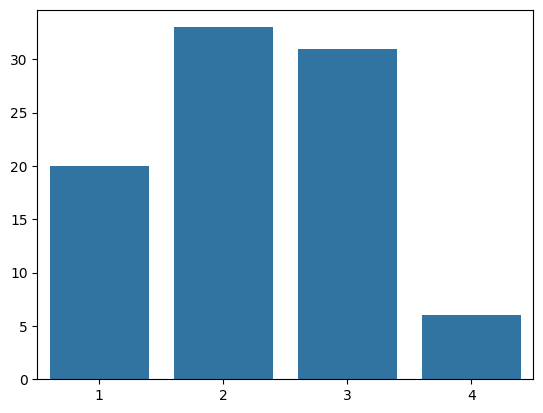

In [6]:
%%capture_img --path "count.png"
sns.barplot(counter)

In [7]:
silhouette_score(data.iloc[:,1:],data['Source'])

np.float64(-0.09718554105143805)

In [8]:
X_embedded = TSNE(n_components=3, learning_rate='auto', perplexity=3).fit_transform(data)

Output saved by creating file at tsne.png.


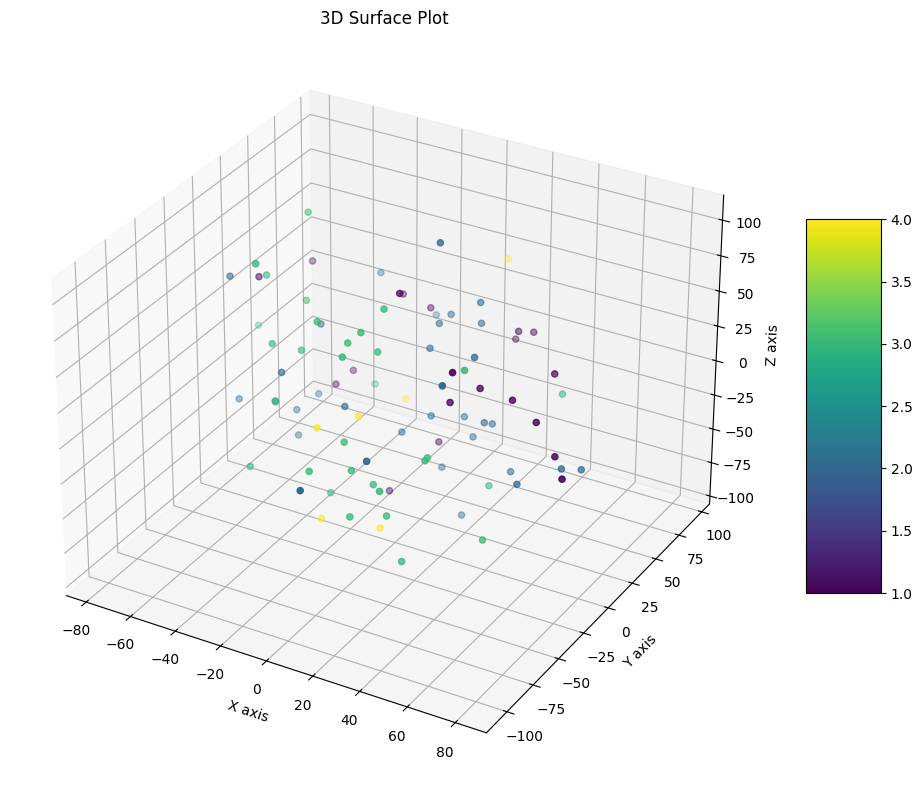

In [9]:
%%capture_img --path "tsne.png"
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Create figure and 3D axis
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot surface
surf = ax.scatter(X_embedded[:,0].reshape(-1,1),X_embedded[:,1].reshape(-1,1),X_embedded[:,2].reshape(-1,1),c=data['Source'] ,cmap='viridis',)

# Add labels and title
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')
ax.set_title('3D Surface Plot')

# Add color bar
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.tight_layout()
plt.show()

# KMeans

Output saved by overwring previous file at silhouette.png.


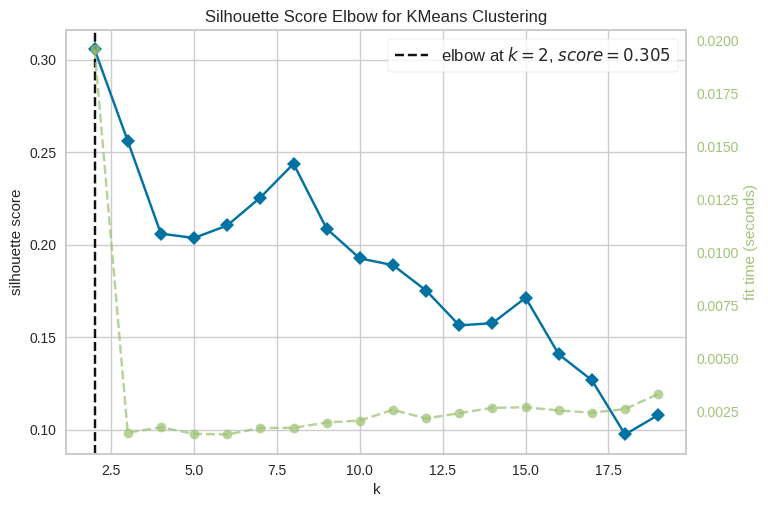

<Figure size 800x550 with 0 Axes>

In [2]:
%%capture_img --path "silhouette.png"
from yellowbrick.cluster import KElbowVisualizer,ClusteringScoreVisualizer
data=pd.read_csv("dataset_4.csv")
scaler=MinMaxScaler()
data=scaler.fit_transform(data)
model = KMeans(random_state=42,max_iter=3000)
visualizer = KElbowVisualizer(model, k=(2,20), metric='silhouette')
visualizer.fit(data)

visualizer.show()
plt.savefig("silhouette.png")

Output saved by overwring previous file at distortion.png.


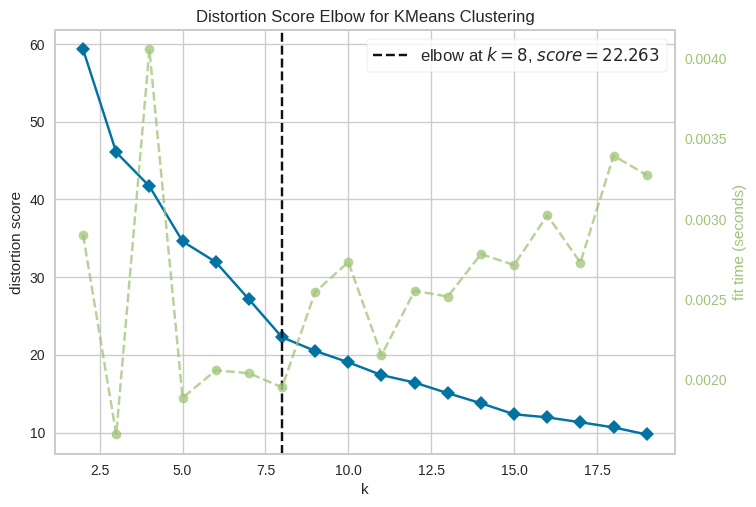

<AxesSubplot: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [3]:
%%capture_img --path "distortion.png"
from yellowbrick.cluster import KElbowVisualizer
data=pd.read_csv("dataset_4.csv")
scaler=MinMaxScaler()
data=scaler.fit_transform(data)
model = KMeans(random_state=42,max_iter=3000)
visualizer = KElbowVisualizer(model, k=(2,20), metric='distortion')
visualizer.fit(data)

visualizer.show()

Output saved by overwring previous file at calinsky.png.


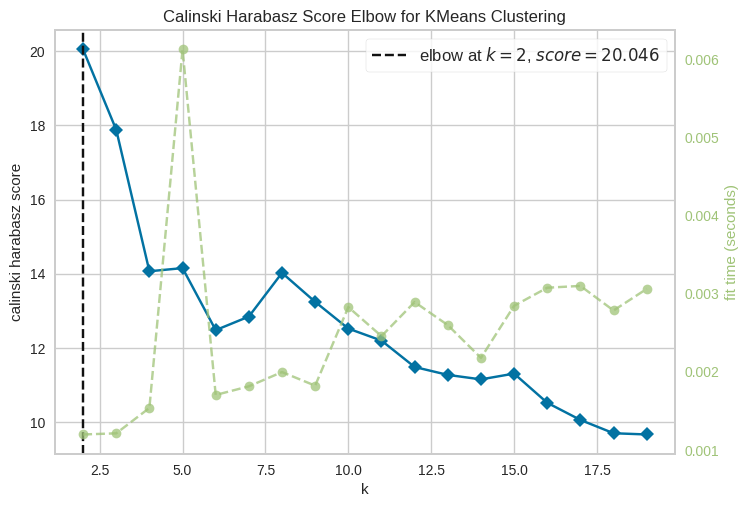

<AxesSubplot: title={'center': 'Calinski Harabasz Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='calinski harabasz score'>

In [4]:
%%capture_img --path "calinsky.png"
from yellowbrick.cluster import KElbowVisualizer
data=pd.read_csv("dataset_4.csv")
scaler=MinMaxScaler()
data=scaler.fit_transform(data)
model = KMeans(random_state=42,max_iter=3000)
visualizer = KElbowVisualizer(model, k=(2,20), metric='calinski_harabasz')
visualizer.fit(data)

visualizer.show()

In [5]:
best_k=model = KMeans(2,random_state=42,max_iter=10000)
data_tran=best_k.fit_transform(data)

In [6]:
from yellowbrick.cluster import InterclusterDistance

Output saved by overwring previous file at mds.png.


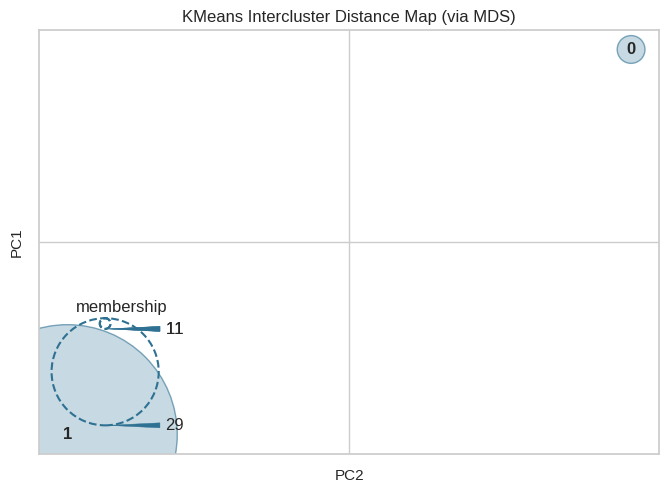

<AxesSubplot: title={'center': 'KMeans Intercluster Distance Map (via MDS)'}, xlabel='PC2', ylabel='PC1'>

In [7]:
%%capture_img --path "mds.png"
inter=InterclusterDistance(best_k)
inter.fit(data)
inter.show()

In [8]:
import collections, numpy
counter = collections.Counter(best_k.labels_+1)

In [45]:
list(counter.items())

[(2, 29), (1, 11)]

Output saved by overwring previous file at count.png.


<AxesSubplot: >

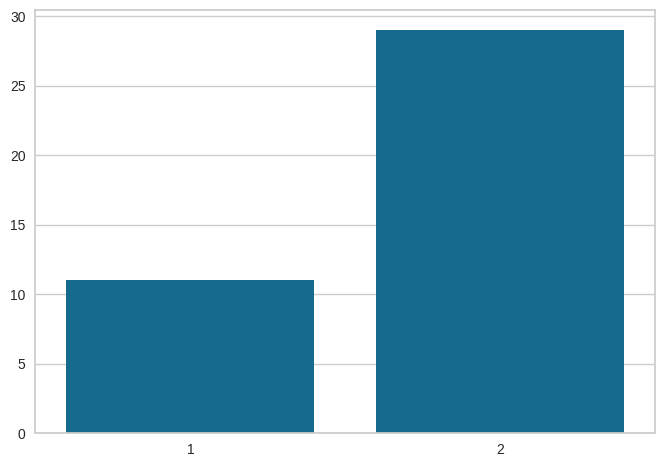

In [9]:
%%capture_img --path "count.png"
sns.barplot(counter)

In [10]:
df_save=pd.read_csv("dataset_4.csv")
df_save["label"]=best_k.labels_+1
df_save.to_csv("kmeans_2_feature.csv")

In [11]:
X_embedded = TSNE(n_components=3, learning_rate='auto', perplexity=3).fit_transform(data)

Output saved by overwring previous file at tsne.png.


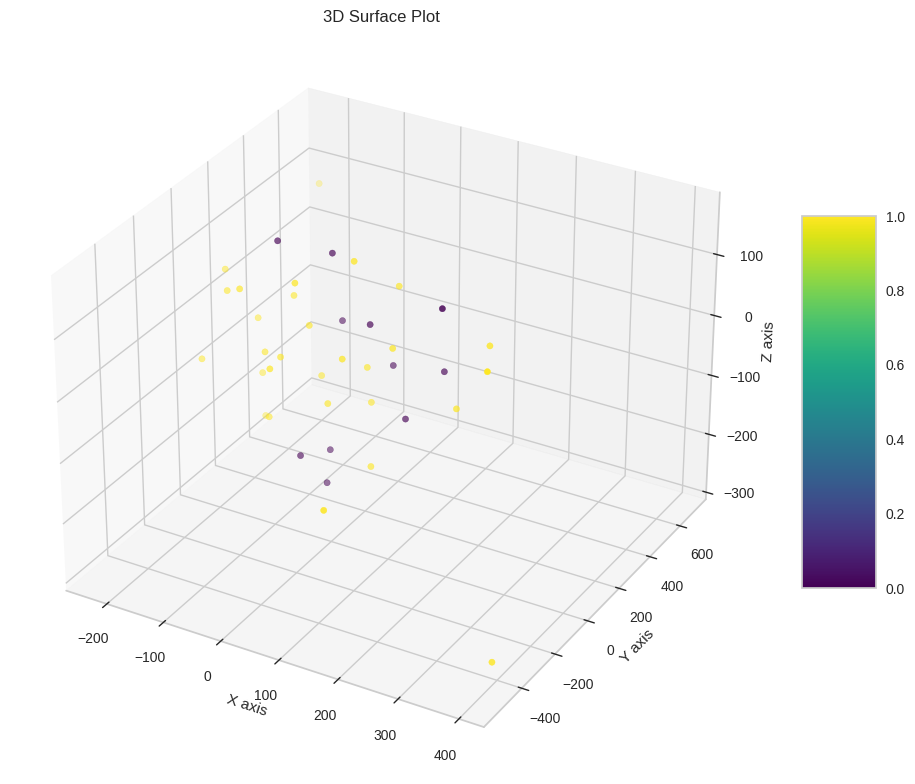

In [12]:
%%capture_img --path "tsne.png"
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Create figure and 3D axis
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot surface
surf = ax.scatter(X_embedded[:,0].reshape(-1,1),X_embedded[:,1].reshape(-1,1),X_embedded[:,2].reshape(-1,1),c=best_k.labels_ ,cmap='viridis',)

# Add labels and title
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')
ax.set_title('3D Surface Plot')

# Add color bar
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.tight_layout()
plt.show()

In [13]:
best_k=model = KMeans(8,random_state=42,max_iter=10000)
data_tran=best_k.fit_transform(data)

Output saved by creating file at mds.png.


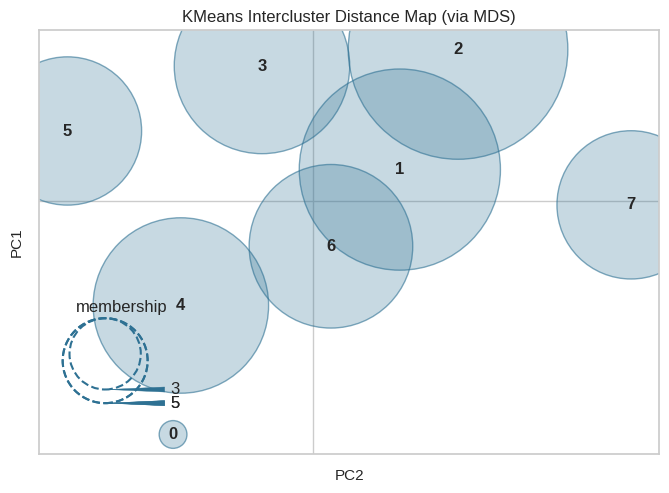

<AxesSubplot: title={'center': 'KMeans Intercluster Distance Map (via MDS)'}, xlabel='PC2', ylabel='PC1'>

In [14]:
%%capture_img --path "mds.png"
inter=InterclusterDistance(best_k)
inter.fit(data)
inter.show()

Output saved by creating file at count.png.


<AxesSubplot: >

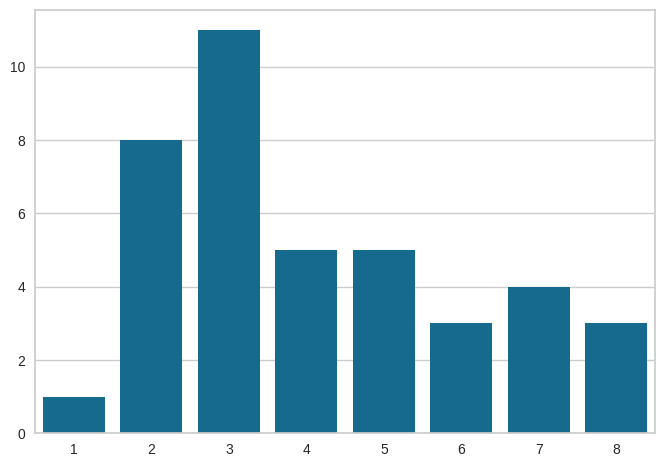

In [15]:
%%capture_img --path "count.png"
counter = collections.Counter(best_k.labels_+1)
sns.barplot(counter)

In [16]:
df_save=pd.read_csv("dataset_4.csv")
df_save["label"]=best_k.labels_+1
df_save.to_csv("kmeans_8_feature.csv")

Output saved by creating file at tsne.png.


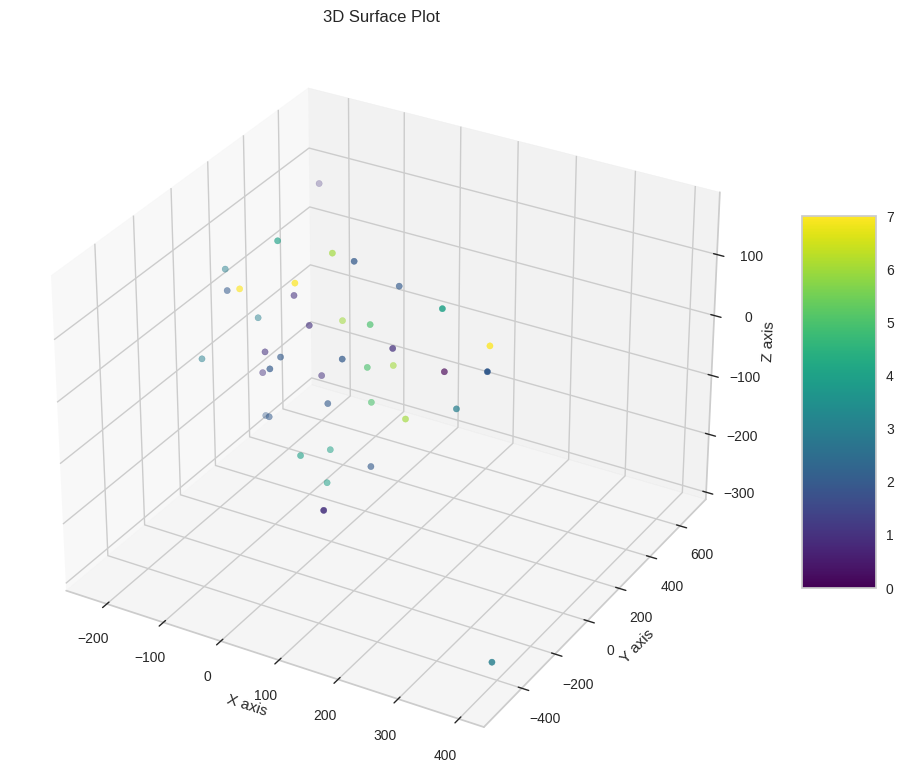

In [17]:
%%capture_img --path "tsne.png"
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Create figure and 3D axis
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot surface
surf = ax.scatter(X_embedded[:,0].reshape(-1,1),X_embedded[:,1].reshape(-1,1),X_embedded[:,2].reshape(-1,1),c=best_k.labels_ ,cmap='viridis',)

# Add labels and title
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')
ax.set_title('3D Surface Plot')

# Add color bar
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.tight_layout()
plt.show()

# PCA and KMeans

In [19]:
from sklearn.decomposition import PCA
pca = PCA(n_components=0.95)
data=pd.read_csv("dataset_4.csv")
scaler=MinMaxScaler()
data=scaler.fit_transform(data)
data=pca.fit_transform(data)

In [20]:
data.shape

(40, 11)

Output saved by creating file at silhouette.png.


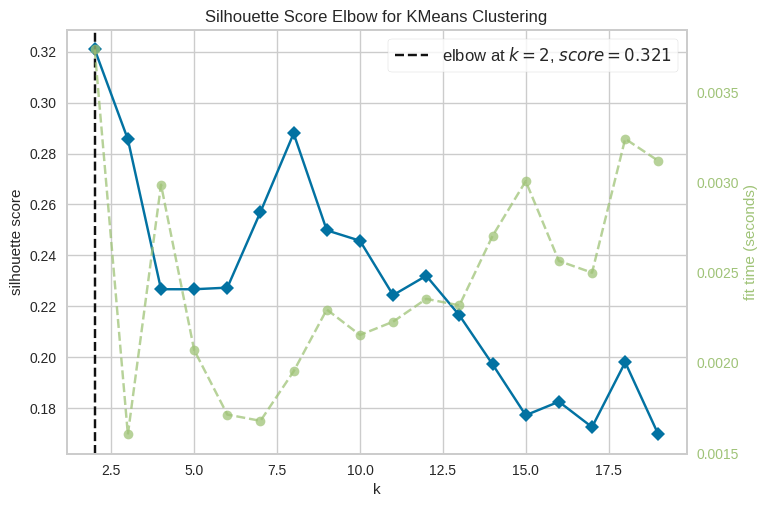

<AxesSubplot: title={'center': 'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [21]:
%%capture_img --path "silhouette.png"
from yellowbrick.cluster import KElbowVisualizer
model = KMeans(random_state=42,max_iter=3000)
visualizer = KElbowVisualizer(model, k=(2,20), metric='silhouette')
visualizer.fit(data)

visualizer.show()

Output saved by creating file at distortion.png.


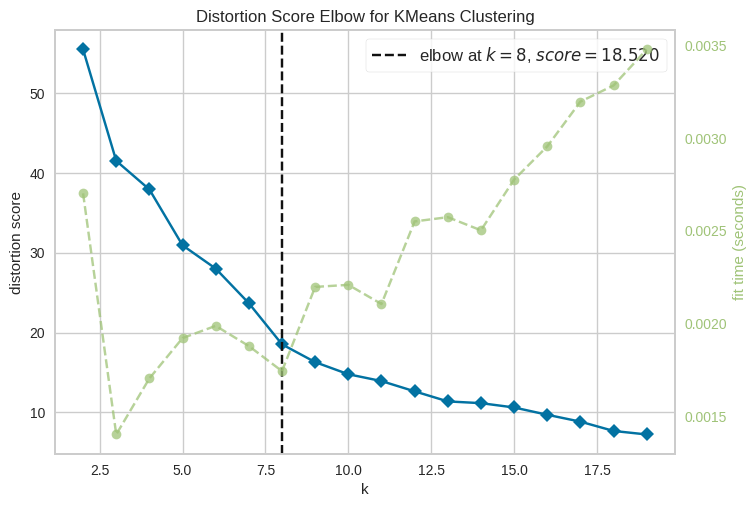

<AxesSubplot: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [22]:
%%capture_img --path "distortion.png"
from yellowbrick.cluster import KElbowVisualizer
model = KMeans(random_state=42,max_iter=3000)
visualizer = KElbowVisualizer(model, k=(2,20), metric='distortion')
visualizer.fit(data)

visualizer.show()

Output saved by creating file at calinski.png.


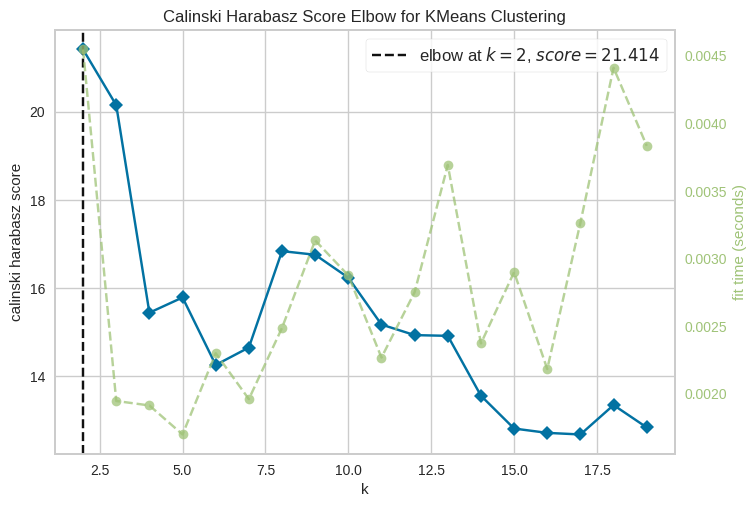

<AxesSubplot: title={'center': 'Calinski Harabasz Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='calinski harabasz score'>

In [23]:
%%capture_img --path "calinski.png"
from yellowbrick.cluster import KElbowVisualizer
model = KMeans(random_state=42,max_iter=3000)
visualizer = KElbowVisualizer(model, k=(2,20), metric='calinski_harabasz')
visualizer.fit(data)

visualizer.show()

In [24]:
best_k=model = KMeans(2,random_state=42,max_iter=10000)
data_tran=best_k.fit_transform(data)

Output saved by creating file at mds.png.


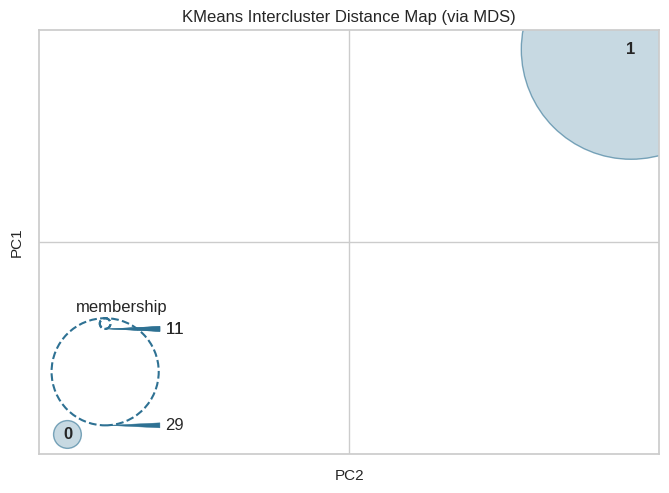

<AxesSubplot: title={'center': 'KMeans Intercluster Distance Map (via MDS)'}, xlabel='PC2', ylabel='PC1'>

In [25]:
%%capture_img --path "mds.png"
inter=InterclusterDistance(best_k)
inter.fit(data)
inter.show()

Output saved by creating file at count.png.


<AxesSubplot: >

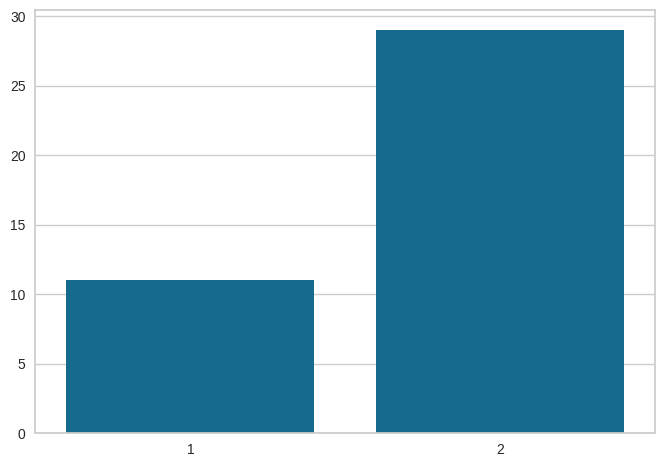

In [26]:
%%capture_img --path "count.png"
counter = collections.Counter(best_k.labels_+1)
sns.barplot(counter)

In [27]:
df_save=pd.read_csv("dataset_4.csv")
df_save["label"]=best_k.labels_+1
df_save.to_csv("kmeans_pca_2_feature.csv")

Output saved by creating file at tsne.png.


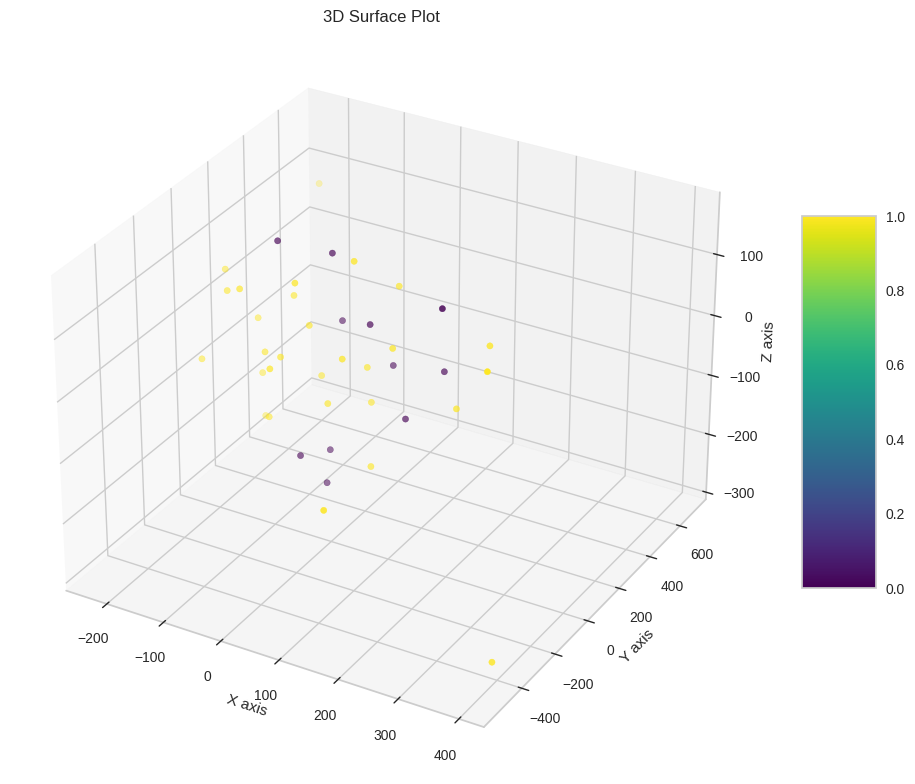

In [28]:
%%capture_img --path "tsne.png"
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Create figure and 3D axis
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot surface
surf = ax.scatter(X_embedded[:,0].reshape(-1,1),X_embedded[:,1].reshape(-1,1),X_embedded[:,2].reshape(-1,1),c=best_k.labels_ ,cmap='viridis',)

# Add labels and title
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')
ax.set_title('3D Surface Plot')

# Add color bar
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.tight_layout()
plt.show()

In [30]:
best_k=model = KMeans(8,random_state=42,max_iter=10000)
data_tran=best_k.fit_transform(data)

Output saved by creating file at mds.png.


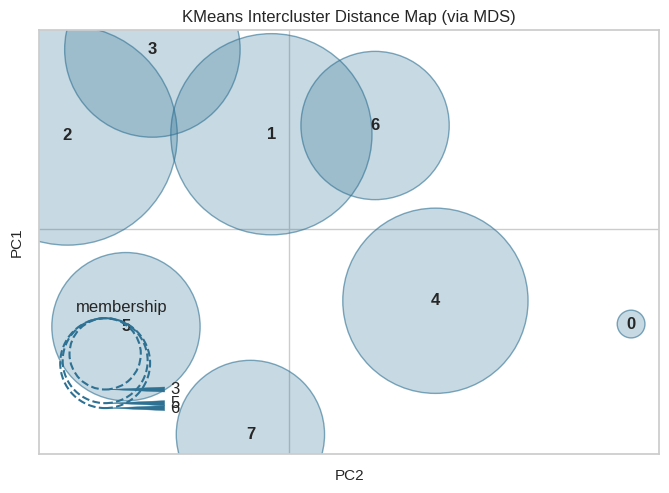

<AxesSubplot: title={'center': 'KMeans Intercluster Distance Map (via MDS)'}, xlabel='PC2', ylabel='PC1'>

In [31]:
%%capture_img --path "mds.png"
inter=InterclusterDistance(best_k)
inter.fit(data)
inter.show()

Output saved by creating file at count.png.


<AxesSubplot: >

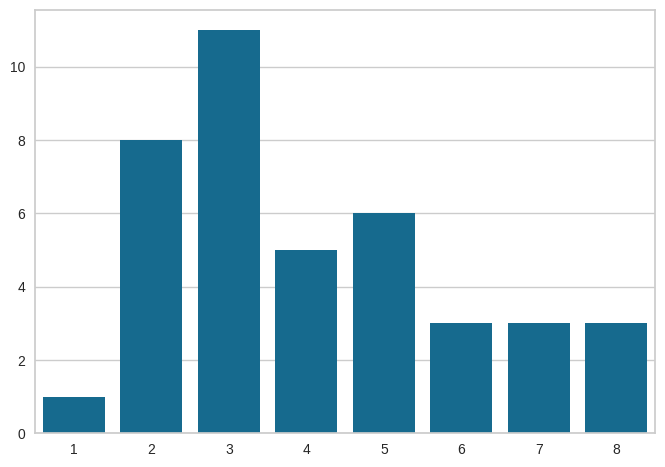

In [32]:
%%capture_img --path "count.png"
counter = collections.Counter(best_k.labels_+1)
sns.barplot(counter)

In [34]:
df_save=pd.read_csv("dataset_4.csv")
df_save["label"]=best_k.labels_+1
df_save.to_csv("kmeans_pca_8_feature.csv")

Output saved by creating file at tsne.png.


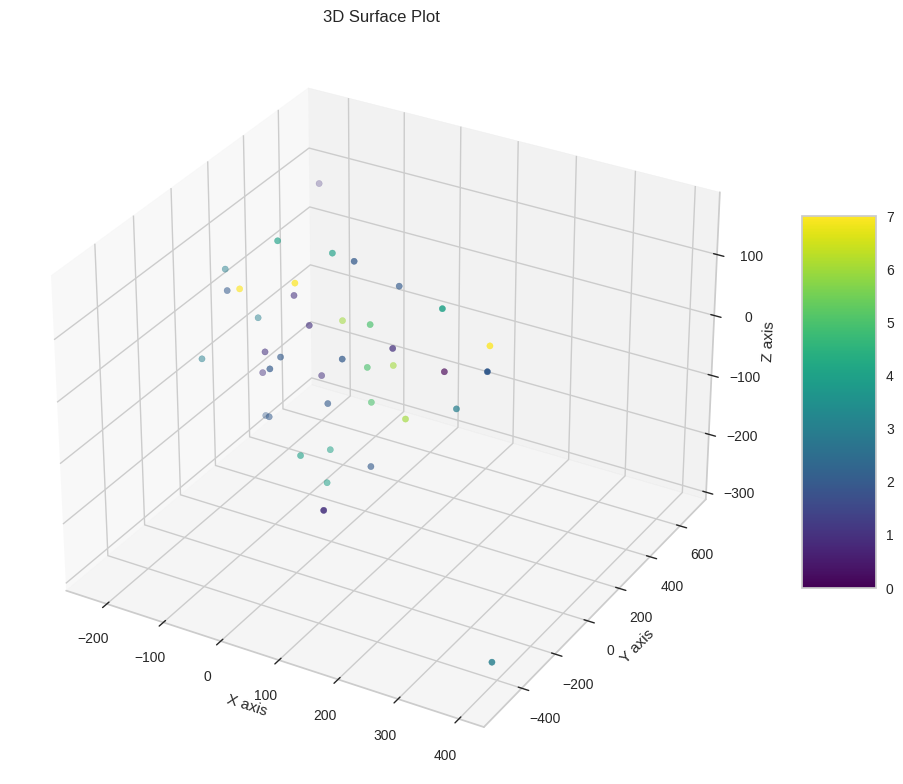

In [35]:
%%capture_img --path "tsne.png"
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Create figure and 3D axis
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot surface
surf = ax.scatter(X_embedded[:,0].reshape(-1,1),X_embedded[:,1].reshape(-1,1),X_embedded[:,2].reshape(-1,1),c=best_k.labels_ ,cmap='viridis',)

# Add labels and title
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')
ax.set_title('3D Surface Plot')

# Add color bar
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.tight_layout()
plt.show()

# Stacked Autoencoder

In [37]:
from clustpy.deep.neural_networks import StackedAutoencoder,VariationalAutoencoder
from clustpy.data import load_mnist
import torch

dat=pd.read_csv("dataset_4.csv")#.to_numpy()
scaler = MinMaxScaler()
dat=torch.tensor(scaler.fit_transform(dat)).float()#[:,temp.argsort()[:60]]
#data = torch.from_numpy(data).float()
SAE = StackedAutoencoder(layers=[dat.shape[1], 500, 2000, 500, 31])

In [38]:
SAE.fit(data=dat,batch_size=128,n_epochs=2000)

Stacked AE training: 100%|█| 80/80 [00:00<00:00, 104.36it/s, Loss=0.00505, Layer
AE training: 100%|██| 2000/2000 [00:52<00:00, 38.45it/s, Training Loss=1.84e-15]


StackedAutoencoder(
  (encoder): FullyConnectedBlock(
    (block): Sequential(
      (0): Linear(in_features=40, out_features=500, bias=True)
      (1): LeakyReLU(negative_slope=0.01)
      (2): Linear(in_features=500, out_features=2000, bias=True)
      (3): LeakyReLU(negative_slope=0.01)
      (4): Linear(in_features=2000, out_features=500, bias=True)
      (5): LeakyReLU(negative_slope=0.01)
      (6): Linear(in_features=500, out_features=31, bias=True)
    )
  )
  (decoder): FullyConnectedBlock(
    (block): Sequential(
      (0): Linear(in_features=31, out_features=500, bias=True)
      (1): LeakyReLU(negative_slope=0.01)
      (2): Linear(in_features=500, out_features=2000, bias=True)
      (3): LeakyReLU(negative_slope=0.01)
      (4): Linear(in_features=2000, out_features=500, bias=True)
      (5): LeakyReLU(negative_slope=0.01)
      (6): Linear(in_features=500, out_features=40, bias=True)
    )
  )
)

In [42]:
print(mean_absolute_error(SAE(dat).detach(),dat))
print(mean_squared_error(SAE(dat).detach(),dat))
print(r2_score(SAE(dat).detach(),dat))

4.394153829370797e-05
6.156043366930484e-09
0.9999997726377648


Output saved by creating file at silhouette.png.


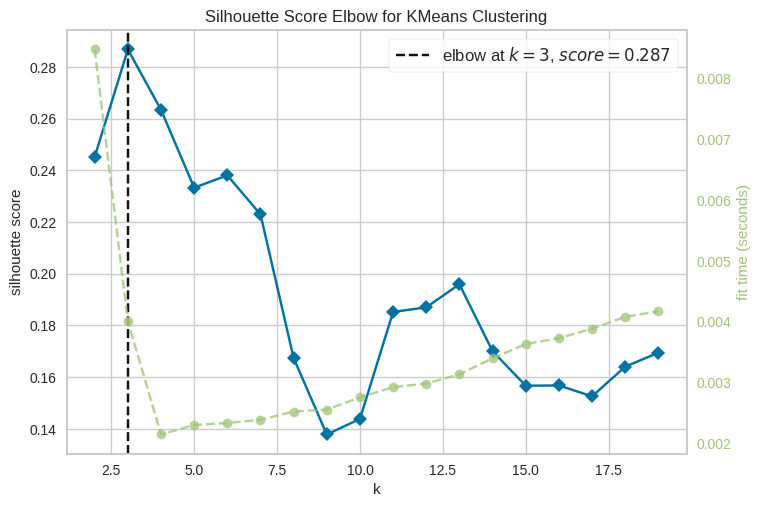

<AxesSubplot: title={'center': 'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [39]:
%%capture_img --path "silhouette.png"
from yellowbrick.cluster import KElbowVisualizer
model = KMeans(random_state=42,max_iter=3000)
visualizer = KElbowVisualizer(model, k=(2,20), metric='silhouette')
visualizer.fit(SAE.encode(dat).detach())

visualizer.show()

Output saved by creating file at distortion.png.


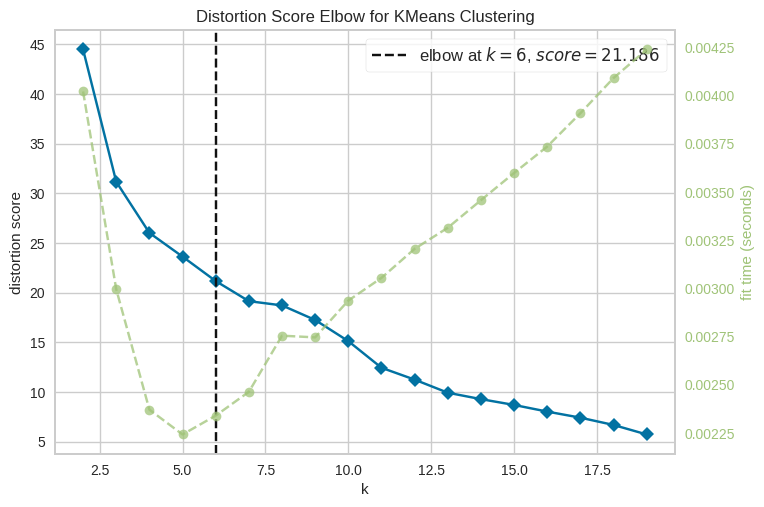

<AxesSubplot: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [40]:
%%capture_img --path "distortion.png"
from yellowbrick.cluster import KElbowVisualizer
model = KMeans(random_state=42,max_iter=3000)
visualizer = KElbowVisualizer(model, k=(2,20), metric='distortion')
visualizer.fit(SAE.encode(dat).detach())

visualizer.show()

Output saved by creating file at calinski.png.


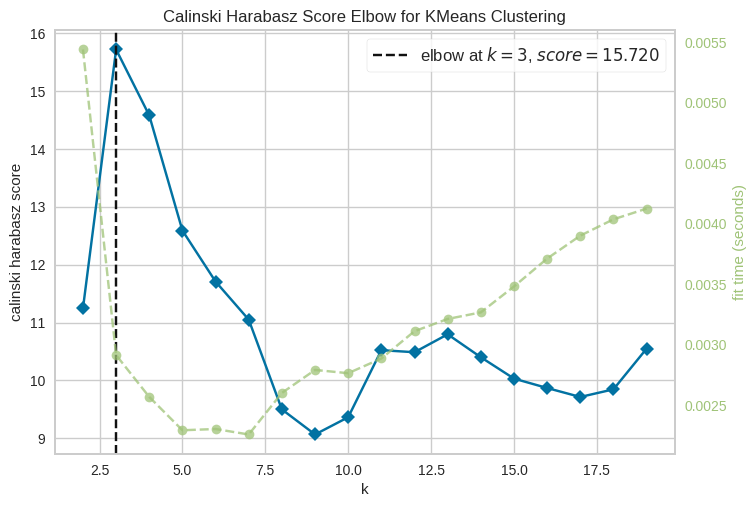

<AxesSubplot: title={'center': 'Calinski Harabasz Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='calinski harabasz score'>

In [41]:
%%capture_img --path "calinski.png"
from yellowbrick.cluster import KElbowVisualizer
model = KMeans(random_state=42,max_iter=3000)
visualizer = KElbowVisualizer(model, k=(2,20), metric='calinski_harabasz')
visualizer.fit(SAE.encode(dat).detach())

visualizer.show()

In [42]:
best_k=model = KMeans(3,random_state=42,max_iter=10000)
data_tran=best_k.fit_transform(SAE.encode(dat).detach())

Output saved by creating file at mds.png.


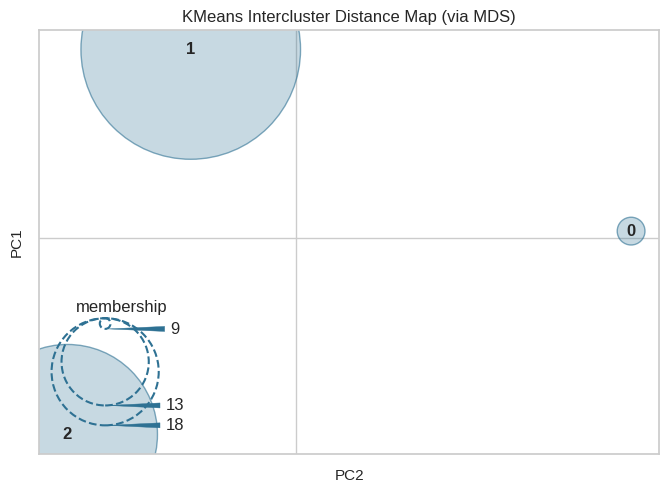

<AxesSubplot: title={'center': 'KMeans Intercluster Distance Map (via MDS)'}, xlabel='PC2', ylabel='PC1'>

In [43]:
%%capture_img --path "mds.png"
inter=InterclusterDistance(best_k)
inter.fit(dat)
inter.show()

Output saved by creating file at count.png.


<AxesSubplot: >

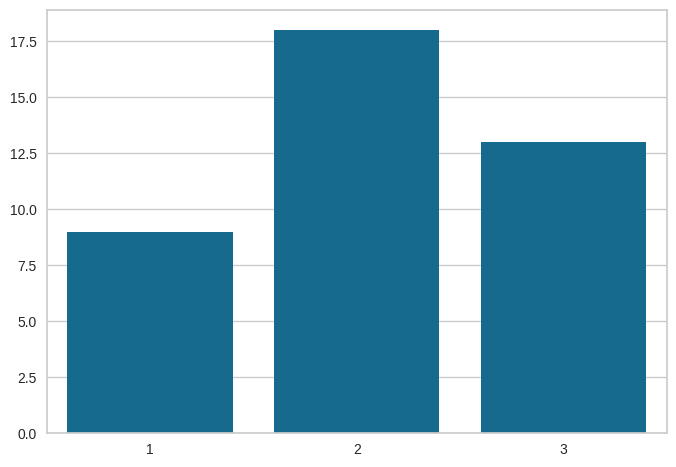

In [44]:
%%capture_img --path "count.png"
counter = collections.Counter(best_k.labels_+1)
sns.barplot(counter)

In [45]:
df_save=pd.read_csv("dataset_4.csv")
df_save["label"]=best_k.labels_+1
df_save.to_csv("kmeans_autoencoder_3_feature.csv")

Output saved by creating file at tsne.png.


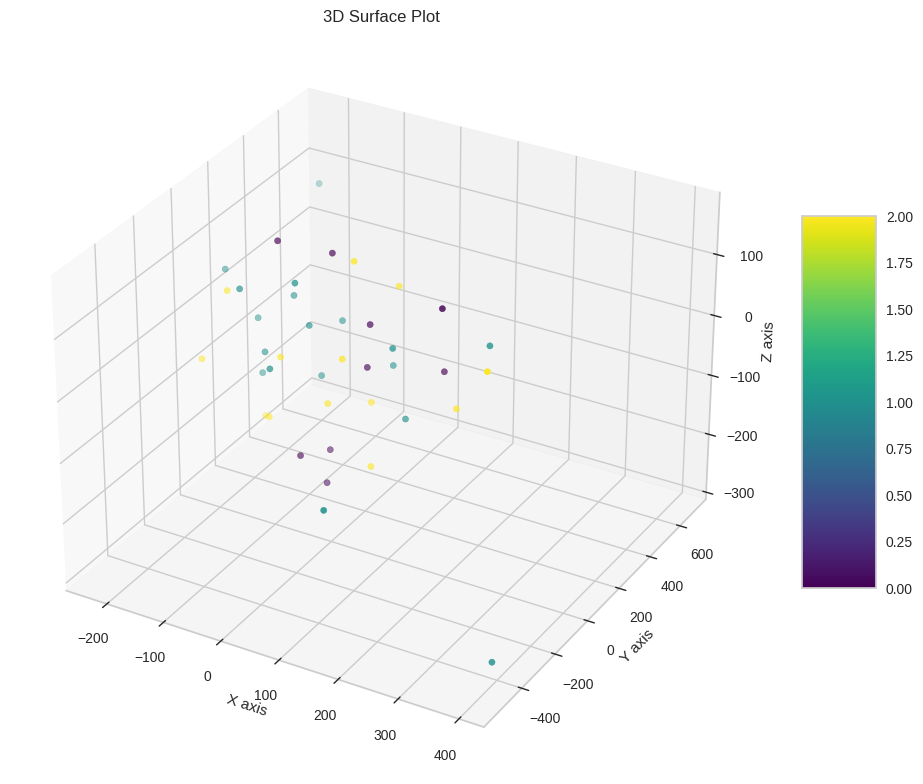

In [46]:
%%capture_img --path "tsne.png"
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Create figure and 3D axis
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot surface
surf = ax.scatter(X_embedded[:,0].reshape(-1,1),X_embedded[:,1].reshape(-1,1),X_embedded[:,2].reshape(-1,1),c=best_k.labels_ ,cmap='viridis',)

# Add labels and title
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')
ax.set_title('3D Surface Plot')

# Add color bar
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.tight_layout()
plt.show()

In [47]:
best_k=model = KMeans(6,random_state=42,max_iter=10000)
data_tran=best_k.fit_transform(SAE.encode(dat).detach())

Output saved by creating file at mds.png.


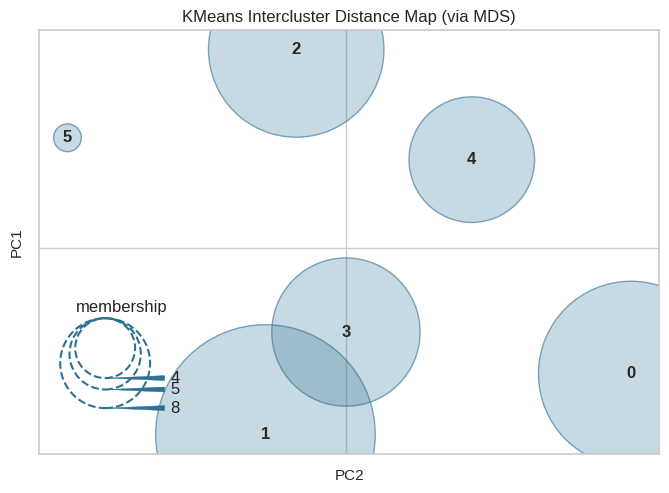

<AxesSubplot: title={'center': 'KMeans Intercluster Distance Map (via MDS)'}, xlabel='PC2', ylabel='PC1'>

In [48]:
%%capture_img --path "mds.png"
inter=InterclusterDistance(best_k)
inter.fit(dat)
inter.show()

Output saved by creating file at count.png.


<AxesSubplot: >

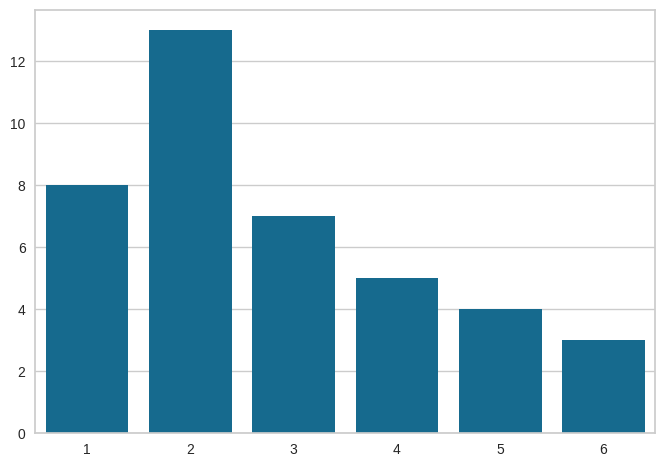

In [49]:
%%capture_img --path "count.png"
counter = collections.Counter(best_k.labels_+1)
sns.barplot(counter)

In [50]:
df_save=pd.read_csv("dataset_4.csv")
df_save["label"]=best_k.labels_+1
df_save.to_csv("kmeans_autoencoder_6_feature.csv")

Output saved by creating file at tsne.png.


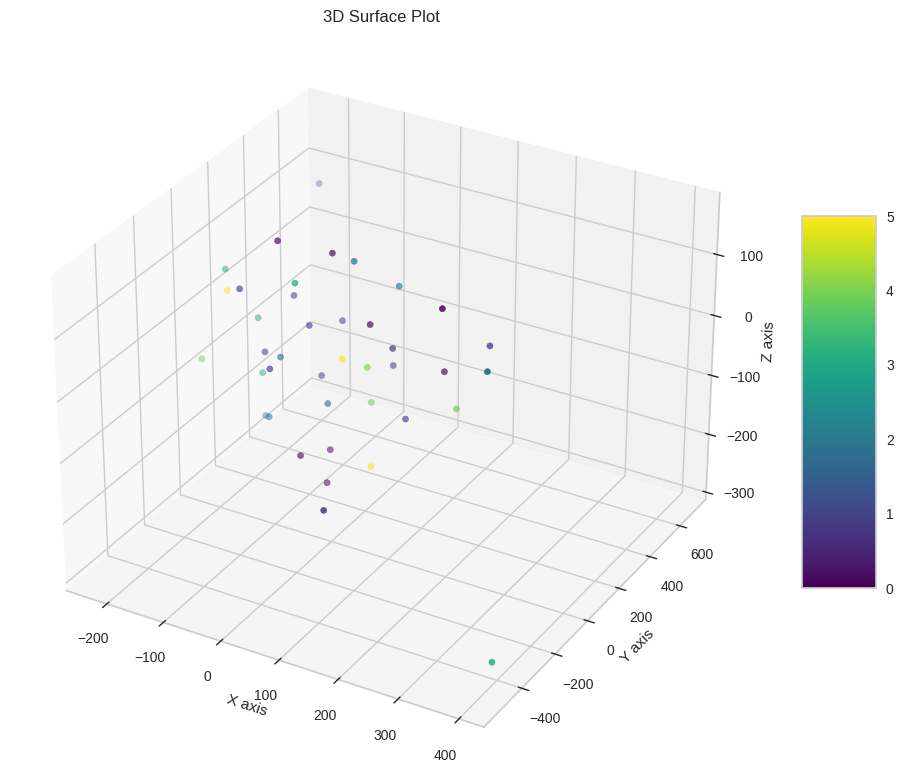

In [51]:
%%capture_img --path "tsne.png"
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Create figure and 3D axis
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot surface
surf = ax.scatter(X_embedded[:,0].reshape(-1,1),X_embedded[:,1].reshape(-1,1),X_embedded[:,2].reshape(-1,1),c=best_k.labels_ ,cmap='viridis',)

# Add labels and title
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')
ax.set_title('3D Surface Plot')

# Add color bar
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.tight_layout()
plt.show()

# DDC

In [52]:
dat=pd.read_csv("dataset_4.csv")#.to_numpy()
scaler = MinMaxScaler()
dat=torch.tensor(scaler.fit_transform(dat)).float()#[:,temp.argsort()[:60]]
ddc = deep.DDC(pretrain_epochs=10000)

In [53]:
ddc.fit(dat)

Neural network is not fitted yet, will be pretrained.


AE training: 100%|█| 10000/10000 [02:53<00:00, 57.74it/s, Training Loss=1.34e-15


DDC(neural_network=FeedforwardAutoencoder(
  (encoder): FullyConnectedBlock(
    (block): Sequential(
      (0): Linear(in_features=40, out_features=500, bias=True)
      (1): LeakyReLU(negative_slope=0.01)
      (2): Linear(in_features=500, out_features=500, bias=True)
      (3): LeakyReLU(negative_slope=0.01)
      (4): Linear(in_features=500, out_features=2000, bias=True)
      (5): LeakyReLU(negative_slope=...
      (3): LeakyReLU(negative_slope=0.01)
      (4): Linear(in_features=500, out_features=500, bias=True)
      (5): LeakyReLU(negative_slope=0.01)
      (6): Linear(in_features=500, out_features=40, bias=True)
    )
  )
),
    pretrain_epochs=10000, pretrain_optimizer_params={'lr': 0.001},
    random_state=RandomState(MT19937) at 0x728558501E40,
    tsne_params={'n_components': 2,
                 'random_state': RandomState(MT19937) at 0x728558501E40})

Output saved by creating file at count.png.


<AxesSubplot: >

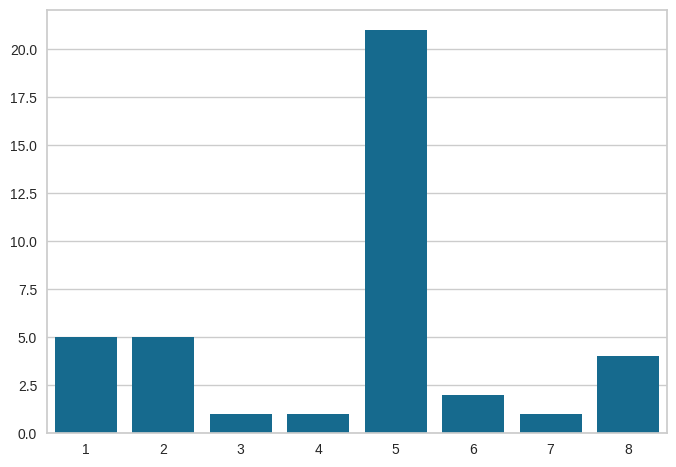

In [54]:
%%capture_img --path "count.png"
counter = collections.Counter(ddc.labels_+1)
sns.barplot(counter)

In [55]:
df_save=pd.read_csv("dataset_4.csv")
df_save["label"]=ddc.labels_+1
df_save.to_csv("ddc_8_feature.csv")

In [56]:
X_embedded = TSNE(n_components=3, learning_rate='auto',
                  perplexity=3).fit_transform(ddc.transform(dat))

Output saved by creating file at tsne.png.


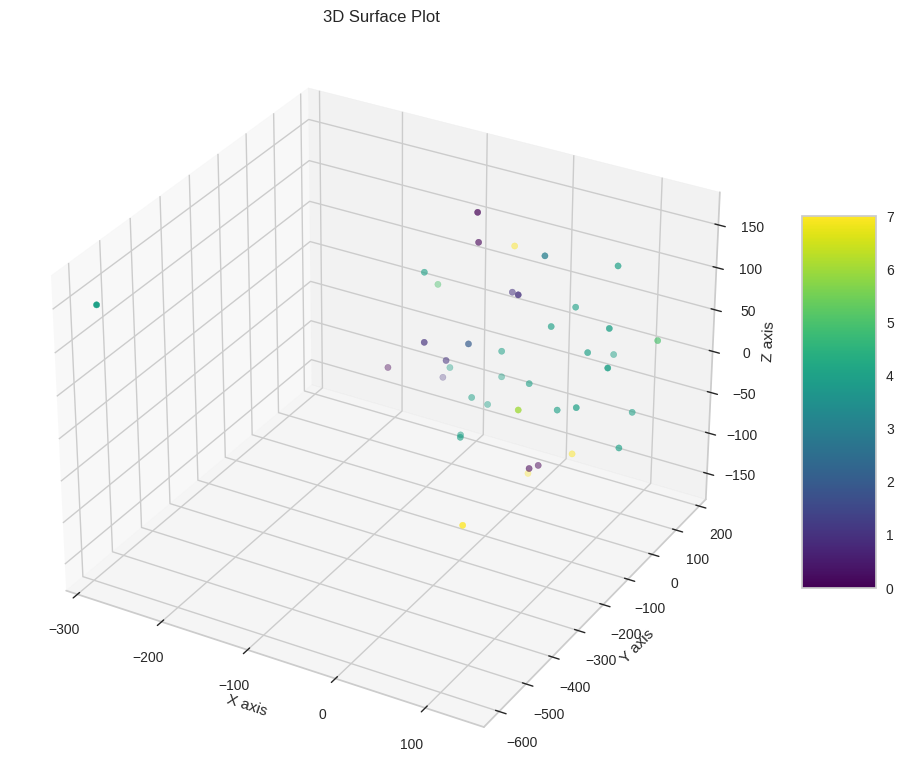

In [57]:
%%capture_img --path "tsne.png"
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Create figure and 3D axis
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot surface
surf = ax.scatter(xs=X_embedded[:,0].reshape(-1,1),ys=X_embedded[:,1].reshape(-1,1),zs=X_embedded[:,2].reshape(-1,1),c=ddc.labels_ ,cmap='viridis',)

# Add labels and title
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')
ax.set_title('3D Surface Plot')

# Add color bar
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.tight_layout()
plt.show()

# DCN

Output saved by creating file at silhouette.png.
Neural network is not fitted yet, will be pretrained.


DCN training: 100%|███████████| 1000/1000 [00:18<00:00, 55.25it/s, Loss=1.17e-5]


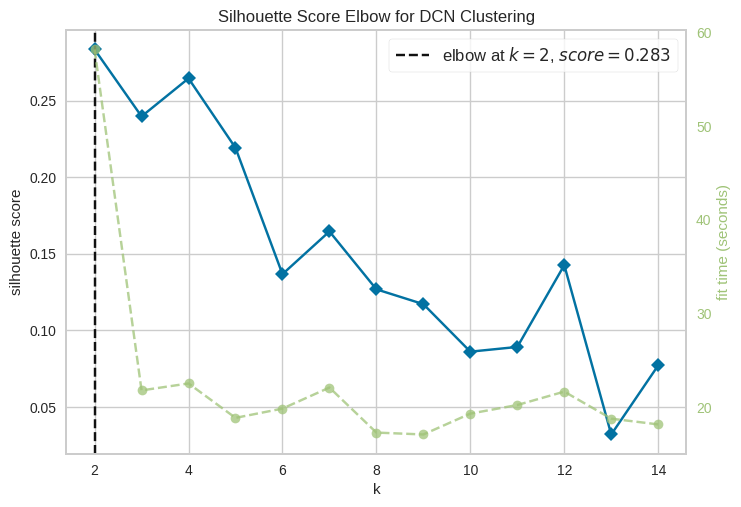

<AxesSubplot: title={'center': 'Silhouette Score Elbow for DCN Clustering'}, xlabel='k', ylabel='silhouette score'>

In [60]:
%%capture_img --path "silhouette.png"
from yellowbrick.cluster import KElbowVisualizer
dat=pd.read_csv("dataset_4.csv")#.to_numpy()
scaler = MinMaxScaler()
dat=torch.tensor(scaler.fit_transform(dat)).float()#[:,temp.argsort()[:60]]
model = KMeans(random_state=42,max_iter=3000)
visualizer = KElbowVisualizer(clustpy.deep.DCN(2,pretrain_epochs=2000,clustering_epochs=1000), k=(2,15), metric='silhouette')
visualizer.fit(dat)

visualizer.show()

In [61]:
dat=pd.read_csv("dataset_4.csv")#.to_numpy()
scaler = MinMaxScaler()
dat=torch.tensor(scaler.fit_transform(dat)).float()#[:,temp.argsort()[:60]]
model = clustpy.deep.DCN(2,pretrain_epochs=5000,clustering_epochs=1000)

In [62]:
model.fit(dat)

Neural network is not fitted yet, will be pretrained.


DCN training: 100%|██████████| 1000/1000 [00:21<00:00, 46.64it/s, Loss=0.000102]


DCN(clustering_epochs=1000, clustering_optimizer_params={'lr': 0.0001},
    initial_clustering_params={}, n_clusters=2,
    neural_network=FeedforwardAutoencoder(
  (encoder): FullyConnectedBlock(
    (block): Sequential(
      (0): Linear(in_features=40, out_features=500, bias=True)
      (1): LeakyReLU(negative_slope=0.01)
      (2): Linear(in_features=500, out_features=500, bias=True)
      (3): LeakyRe...
      (1): LeakyReLU(negative_slope=0.01)
      (2): Linear(in_features=2000, out_features=500, bias=True)
      (3): LeakyReLU(negative_slope=0.01)
      (4): Linear(in_features=500, out_features=500, bias=True)
      (5): LeakyReLU(negative_slope=0.01)
      (6): Linear(in_features=500, out_features=40, bias=True)
    )
  )
),
    pretrain_epochs=5000, pretrain_optimizer_params={'lr': 0.001},
    random_state=RandomState(MT19937) at 0x728558501E40)

Output saved by creating file at count.png.


<AxesSubplot: >

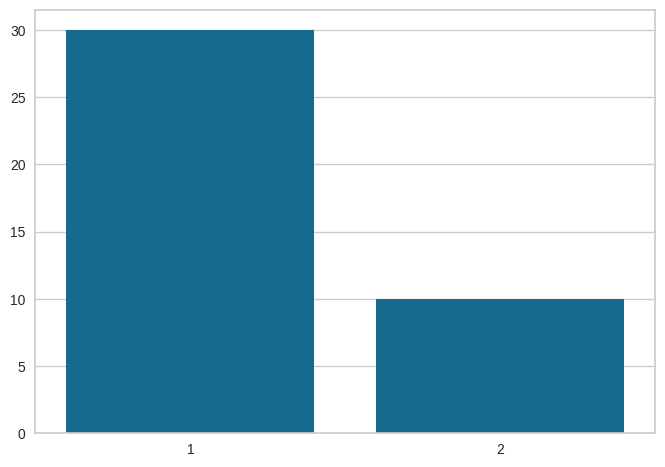

In [63]:
%%capture_img --path "count.png"
counter = collections.Counter(model.labels_+1)
sns.barplot(counter)

In [64]:
X_embedded = TSNE(n_components=3, learning_rate='auto',
                  perplexity=3).fit_transform(model.neural_network.cpu().encoder(dat.cpu()).cpu().detach())

Output saved by creating file at tsne.png.


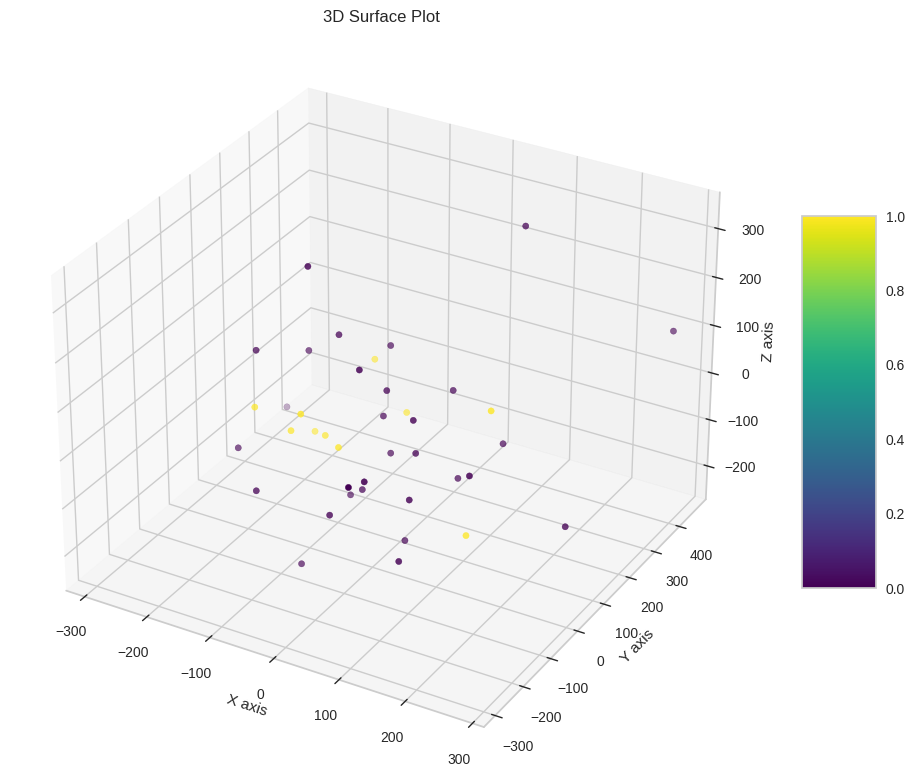

In [65]:
%%capture_img --path "tsne.png"
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Create figure and 3D axis
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot surface
surf = ax.scatter(xs=X_embedded[:,0].reshape(-1,1),ys=X_embedded[:,1].reshape(-1,1),zs=X_embedded[:,2].reshape(-1,1),c=model.labels_ ,cmap='viridis',)

# Add labels and title
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')
ax.set_title('3D Surface Plot')

# Add color bar
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.tight_layout()
plt.show()

In [2]:
df_save=pd.read_csv("dataset_4.csv")
df_save["label"]=model.labels_+1
df_save.to_csv("dcn_2_feature.csv")

NameError: name 'model' is not defined

Output saved by creating file at distortion.png.
Neural network is not fitted yet, will be pretrained.


DCN training: 100%|█████| 1000/1000 [1310:56:58<00:00, 4719.42s/it, Loss=1.7e-5]


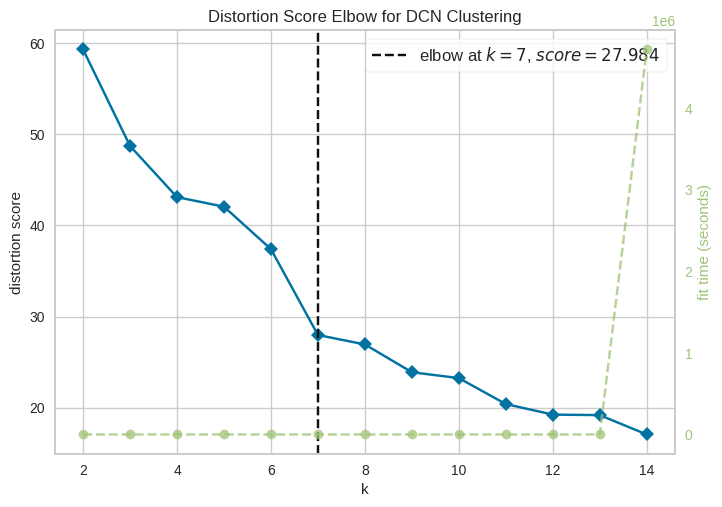

<AxesSubplot: title={'center': 'Distortion Score Elbow for DCN Clustering'}, xlabel='k', ylabel='distortion score'>

In [3]:
%%capture_img --path "distortion.png"
from yellowbrick.cluster import KElbowVisualizer
dat=pd.read_csv("dataset_4.csv")#.to_numpy()
scaler = MinMaxScaler()
dat=torch.tensor(scaler.fit_transform(dat)).float()#[:,temp.argsort()[:60]]
model = KMeans(random_state=42,max_iter=3000)
visualizer = KElbowVisualizer(clustpy.deep.DCN(2,pretrain_epochs=2000,clustering_epochs=1000), k=(2,15), metric='distortion')
visualizer.fit(dat)

visualizer.show()

In [2]:
dat=pd.read_csv("dataset_4.csv")#.to_numpy()
scaler = MinMaxScaler()
dat=torch.tensor(scaler.fit_transform(dat)).float()#[:,temp.argsort()[:60]]
model = clustpy.deep.DCN(7,pretrain_epochs=5000,clustering_epochs=1000)

In [3]:
model.fit(dat)

Neural network is not fitted yet, will be pretrained.


DCN training: 100%|███████████| 1000/1000 [00:22<00:00, 44.58it/s, Loss=8.56e-5]


DCN(clustering_epochs=1000, clustering_optimizer_params={'lr': 0.0001},
    initial_clustering_params={}, n_clusters=7,
    neural_network=FeedforwardAutoencoder(
  (encoder): FullyConnectedBlock(
    (block): Sequential(
      (0): Linear(in_features=40, out_features=500, bias=True)
      (1): LeakyReLU(negative_slope=0.01)
      (2): Linear(in_features=500, out_features=500, bias=True)
      (3): LeakyRe...
      (1): LeakyReLU(negative_slope=0.01)
      (2): Linear(in_features=2000, out_features=500, bias=True)
      (3): LeakyReLU(negative_slope=0.01)
      (4): Linear(in_features=500, out_features=500, bias=True)
      (5): LeakyReLU(negative_slope=0.01)
      (6): Linear(in_features=500, out_features=40, bias=True)
    )
  )
),
    pretrain_epochs=5000, pretrain_optimizer_params={'lr': 0.001},
    random_state=RandomState(MT19937) at 0x7AAE2C20DE40)

Output saved by creating file at count.png.


<AxesSubplot: >

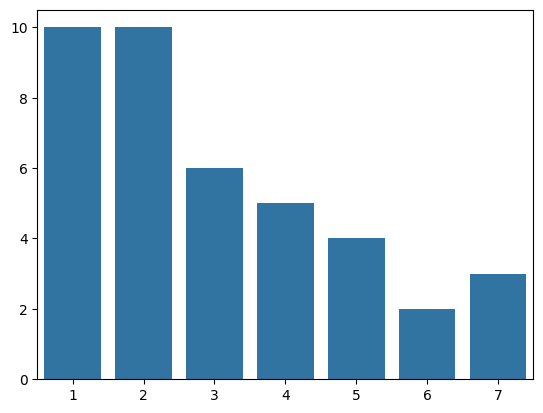

In [5]:
%%capture_img --path "count.png"
counter = collections.Counter(model.labels_+1)
sns.barplot(counter)

In [6]:
X_embedded = TSNE(n_components=3, learning_rate='auto',
                  perplexity=3).fit_transform(model.neural_network.cpu().encoder(dat.cpu()).cpu().detach())

Output saved by creating file at tsne.png.


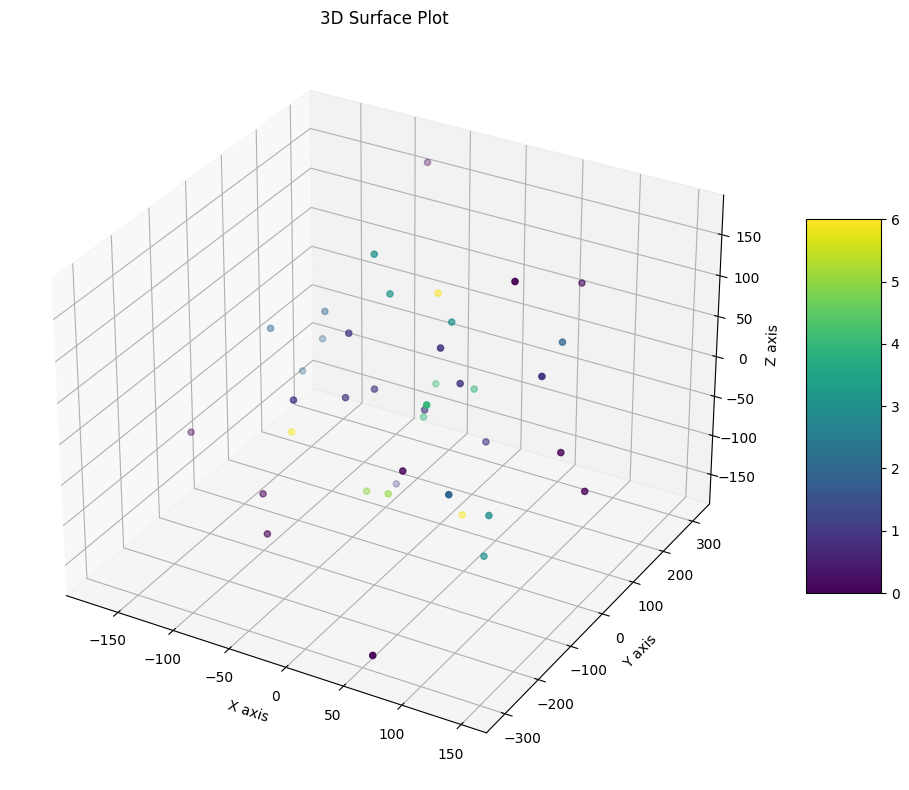

In [7]:
%%capture_img --path "tsne.png"
# Create figure and 3D axis
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot surface
surf = ax.scatter(xs=X_embedded[:,0].reshape(-1,1),ys=X_embedded[:,1].reshape(-1,1),zs=X_embedded[:,2].reshape(-1,1),c=model.labels_ ,cmap='viridis',)

# Add labels and title
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')
ax.set_title('3D Surface Plot')

# Add color bar
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.tight_layout()
plt.show()

In [8]:
df_save=pd.read_csv("dataset_4.csv")
df_save["label"]=model.labels_+1
df_save.to_csv("dcn_7_feature.csv")

Output saved by creating file at calinski.png.
Neural network is not fitted yet, will be pretrained.


DCN training: 100%|███████████| 1000/1000 [00:18<00:00, 53.60it/s, Loss=1.55e-5]


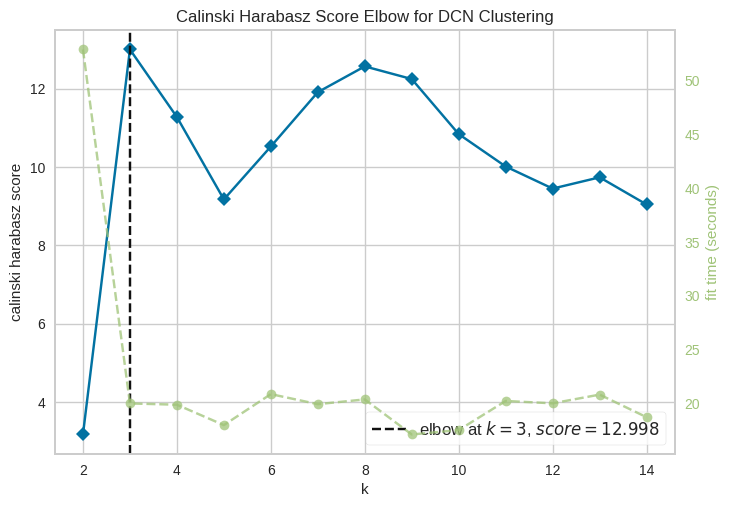

<AxesSubplot: title={'center': 'Calinski Harabasz Score Elbow for DCN Clustering'}, xlabel='k', ylabel='calinski harabasz score'>

In [10]:
%%capture_img --path "calinski.png"
from yellowbrick.cluster import KElbowVisualizer
dat=pd.read_csv("dataset_4.csv")#.to_numpy()
scaler = MinMaxScaler()
dat=torch.tensor(scaler.fit_transform(dat)).float()#[:,temp.argsort()[:60]]
model = KMeans(random_state=42,max_iter=3000)
visualizer = KElbowVisualizer(clustpy.deep.DCN(2,pretrain_epochs=2000,clustering_epochs=1000), k=(2,15), metric='calinski_harabasz')
visualizer.fit(dat)

visualizer.show()

In [9]:
dat=pd.read_csv("dataset_4.csv")#.to_numpy()
scaler = MinMaxScaler()
dat=torch.tensor(scaler.fit_transform(dat)).float()#[:,temp.argsort()[:60]]
model = clustpy.deep.DCN(3,pretrain_epochs=5000,clustering_epochs=1000)

In [10]:
model.fit(dat)

Neural network is not fitted yet, will be pretrained.


DCN training: 100%|██████████| 1000/1000 [00:19<00:00, 50.39it/s, Loss=0.000128]


DCN(clustering_epochs=1000, clustering_optimizer_params={'lr': 0.0001},
    initial_clustering_params={}, n_clusters=3,
    neural_network=FeedforwardAutoencoder(
  (encoder): FullyConnectedBlock(
    (block): Sequential(
      (0): Linear(in_features=40, out_features=500, bias=True)
      (1): LeakyReLU(negative_slope=0.01)
      (2): Linear(in_features=500, out_features=500, bias=True)
      (3): LeakyRe...
      (1): LeakyReLU(negative_slope=0.01)
      (2): Linear(in_features=2000, out_features=500, bias=True)
      (3): LeakyReLU(negative_slope=0.01)
      (4): Linear(in_features=500, out_features=500, bias=True)
      (5): LeakyReLU(negative_slope=0.01)
      (6): Linear(in_features=500, out_features=40, bias=True)
    )
  )
),
    pretrain_epochs=5000, pretrain_optimizer_params={'lr': 0.001},
    random_state=RandomState(MT19937) at 0x7AAE2C20DE40)

Output saved by creating file at count.png.


<AxesSubplot: >

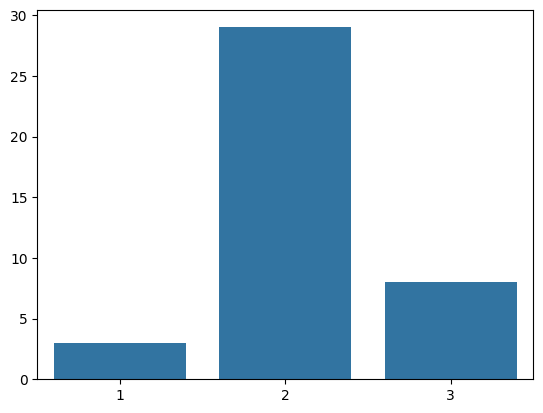

In [11]:
%%capture_img --path "count.png"
counter = collections.Counter(model.labels_+1)
sns.barplot(counter)

In [12]:
X_embedded = TSNE(n_components=3, learning_rate='auto',
                  perplexity=3).fit_transform(model.neural_network.cpu().encoder(dat.cpu()).cpu().detach())

Output saved by creating file at tsne.png.


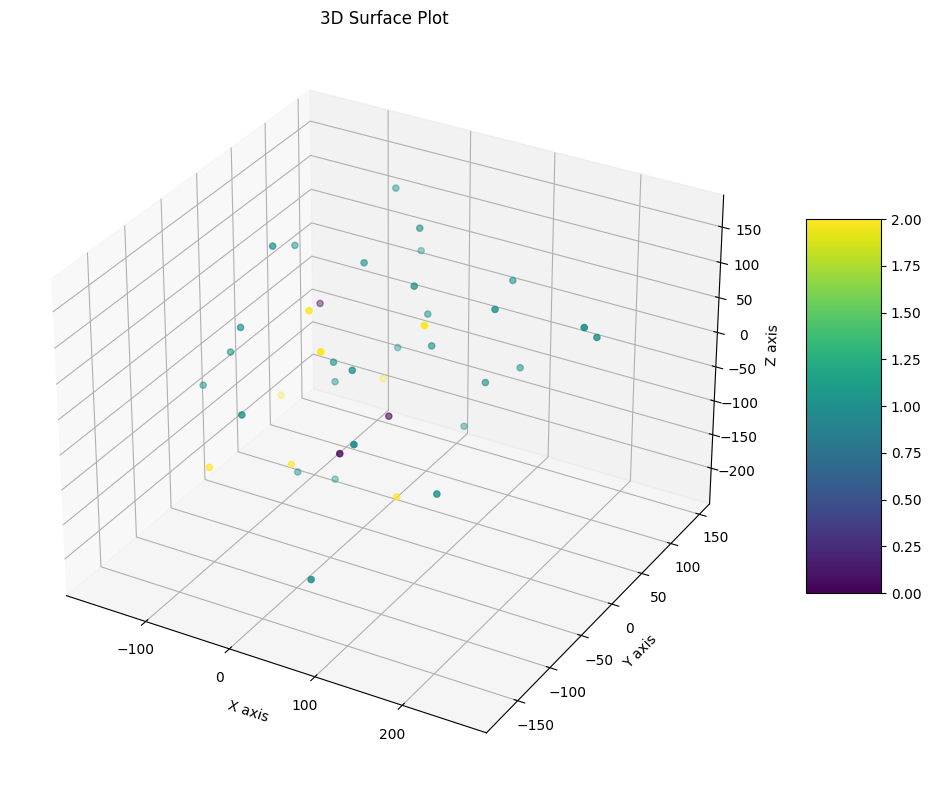

In [13]:
%%capture_img --path "tsne.png"
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Create figure and 3D axis
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot surface
surf = ax.scatter(xs=X_embedded[:,0].reshape(-1,1),ys=X_embedded[:,1].reshape(-1,1),zs=X_embedded[:,2].reshape(-1,1),c=model.labels_ ,cmap='viridis',)

# Add labels and title
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')
ax.set_title('3D Surface Plot')

# Add color bar
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.tight_layout()
plt.show()

In [14]:
df_save=pd.read_csv("dataset_4.csv")
df_save["label"]=model.labels_+1
df_save.to_csv("dcn_3_feature.csv")

# DEC

Output saved by creating file at silhouette.png.
Neural network is not fitted yet, will be pretrained.


DEC training: 100%|██████████████| 1000/1000 [00:10<00:00, 99.65it/s, Loss=1.04]
/home/hamed/.local/lib/python3.10/site-packages/sklearn/base.py:1389: ConvergenceWarning: Number of distinct clusters (6) found smaller than n_clusters (7). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
DEC training: 100%|████████████| 1000/1000 [00:09<00:00, 101.04it/s, Loss=0.887]
/home/hamed/.local/lib/python3.10/site-packages/sklearn/base.py:1389: ConvergenceWarning: Number of distinct clusters (5) found smaller than n_clusters (6). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
/home/hamed/.local/lib/python3.10/site-packages/sklearn/base.py:1389: ConvergenceWarning: Number of distinct clusters (5) found smaller than n_clusters (8). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
DEC training: 100%|████████████| 1000/1000 [00:09<00:00, 101.47it/s, Loss=0.957]
/home/hamed/.local/lib/py

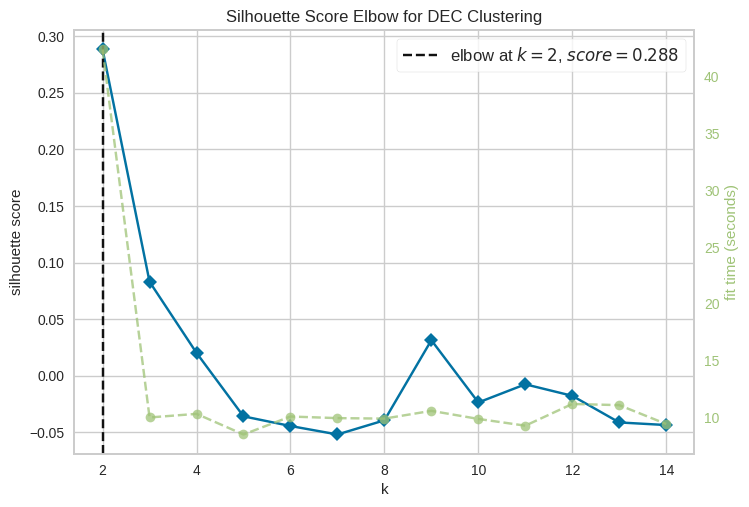

<AxesSubplot: title={'center': 'Silhouette Score Elbow for DEC Clustering'}, xlabel='k', ylabel='silhouette score'>

In [16]:
%%capture_img --path "silhouette.png"
from yellowbrick.cluster import KElbowVisualizer
dat=pd.read_csv("dataset_4.csv")#.to_numpy()
scaler = MinMaxScaler()
dat=torch.tensor(scaler.fit_transform(dat)).float()#[:,temp.argsort()[:60]]
visualizer = KElbowVisualizer(clustpy.deep.DEC(1,pretrain_epochs=2000,clustering_epochs=1000,embedding_size=40), k=(2,15), metric='silhouette')
visualizer.fit(dat)

visualizer.show()

In [18]:
dat=pd.read_csv("dataset_4.csv")#.to_numpy()
scaler = MinMaxScaler()
dat=torch.tensor(scaler.fit_transform(dat)).float()#[:,temp.argsort()[:60]]
model = clustpy.deep.DEC(2,pretrain_epochs=2000,clustering_epochs=1000)

In [19]:
model.fit(dat)

Neural network is not fitted yet, will be pretrained.


DEC training: 100%|████████████| 1000/1000 [00:09<00:00, 105.26it/s, Loss=0.132]


DEC(clustering_epochs=1000, clustering_optimizer_params={'lr': 0.0001},
    initial_clustering_params={}, n_clusters=2,
    neural_network=FeedforwardAutoencoder(
  (encoder): FullyConnectedBlock(
    (block): Sequential(
      (0): Linear(in_features=40, out_features=500, bias=True)
      (1): LeakyReLU(negative_slope=0.01)
      (2): Linear(in_features=500, out_features=500, bias=True)
      (3): LeakyRe...
      (1): LeakyReLU(negative_slope=0.01)
      (2): Linear(in_features=2000, out_features=500, bias=True)
      (3): LeakyReLU(negative_slope=0.01)
      (4): Linear(in_features=500, out_features=500, bias=True)
      (5): LeakyReLU(negative_slope=0.01)
      (6): Linear(in_features=500, out_features=40, bias=True)
    )
  )
),
    pretrain_epochs=2000, pretrain_optimizer_params={'lr': 0.001},
    random_state=RandomState(MT19937) at 0x7AAE2C20DE40)

Output saved by creating file at count.png.


<AxesSubplot: >

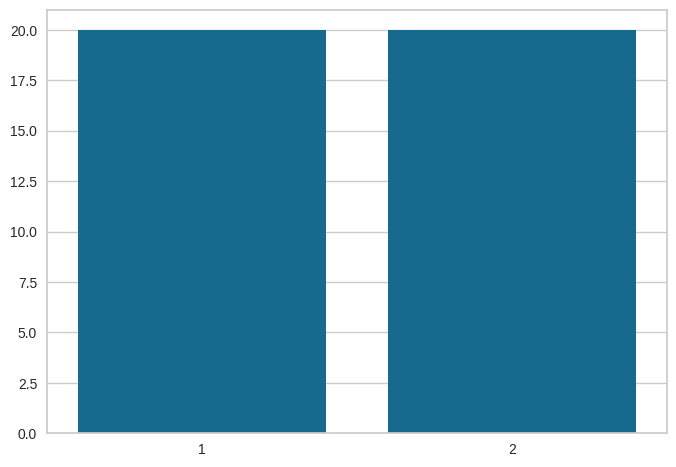

In [20]:
%%capture_img --path "count.png"
counter = collections.Counter(model.labels_+1)
sns.barplot(counter)

In [21]:
X_embedded = TSNE(n_components=3, learning_rate='auto',
                  perplexity=3).fit_transform(model.neural_network.cpu().encoder(dat.cpu()).cpu().detach())

Output saved by creating file at tsne.png.


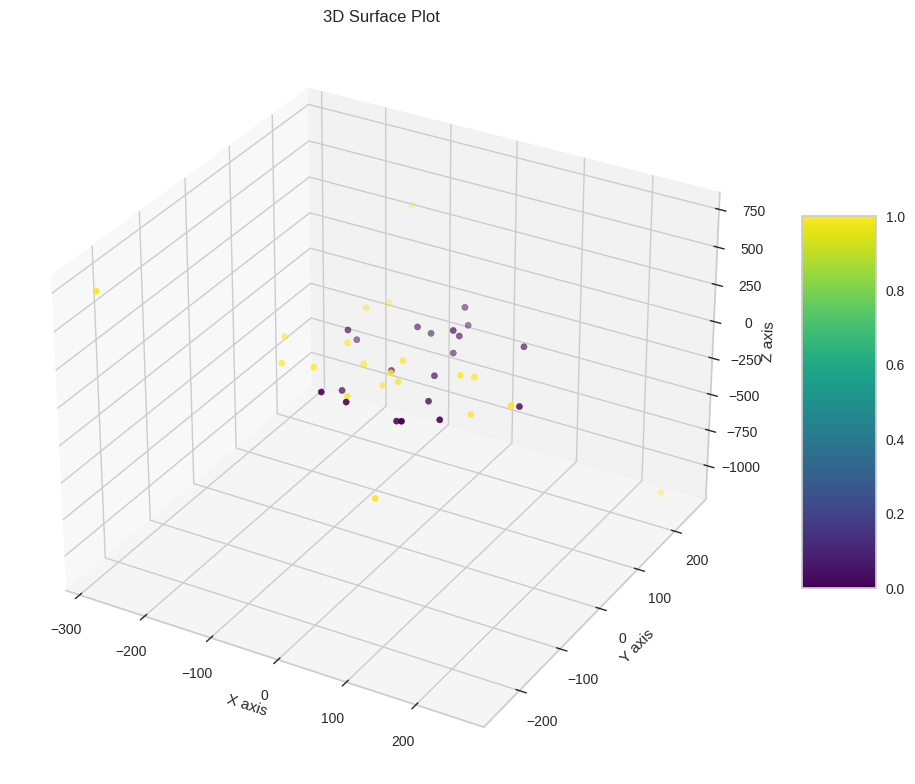

In [22]:
%%capture_img --path "tsne.png"
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Create figure and 3D axis
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot surface
surf = ax.scatter(xs=X_embedded[:,0].reshape(-1,1),ys=X_embedded[:,1].reshape(-1,1),zs=X_embedded[:,2].reshape(-1,1),c=model.labels_ ,cmap='viridis',)

# Add labels and title
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')
ax.set_title('3D Surface Plot')

# Add color bar
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.tight_layout()
plt.show()


In [23]:
df_save=pd.read_csv("dataset_4.csv")
df_save["label"]=model.labels_+1
df_save.to_csv("dec_2_feature.csv")

Output saved by creating file at distortion.png.
Neural network is not fitted yet, will be pretrained.


DEC training: 100%|██████████████| 1000/1000 [00:10<00:00, 91.65it/s, Loss=1.02]
/home/hamed/.local/lib/python3.10/site-packages/sklearn/base.py:1389: ConvergenceWarning: Number of distinct clusters (7) found smaller than n_clusters (8). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
DEC training: 100%|█████████████| 1000/1000 [00:09<00:00, 100.23it/s, Loss=1.17]
/home/hamed/.local/lib/python3.10/site-packages/sklearn/base.py:1389: ConvergenceWarning: Number of distinct clusters (8) found smaller than n_clusters (9). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
DEC training: 100%|█████████████| 1000/1000 [00:09<00:00, 103.99it/s, Loss=1.24]
/home/hamed/.local/lib/python3.10/site-packages/sklearn/base.py:1389: ConvergenceWarning: Number of distinct clusters (9) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
DEC training: 100%|█████

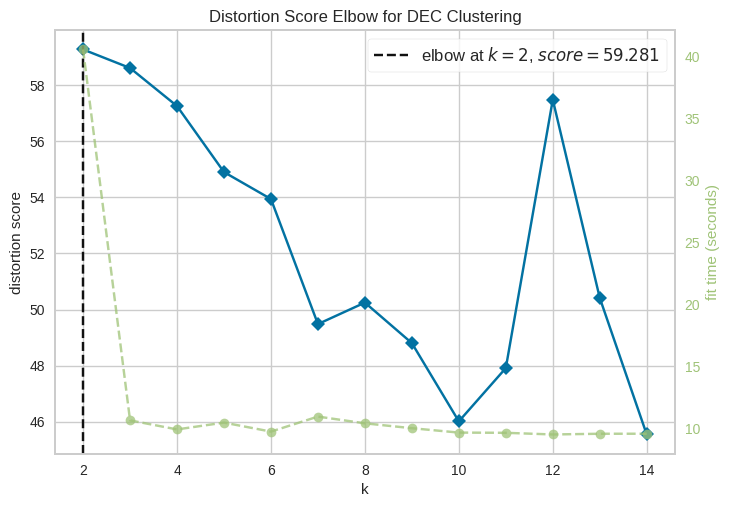

<AxesSubplot: title={'center': 'Distortion Score Elbow for DEC Clustering'}, xlabel='k', ylabel='distortion score'>

In [24]:
%%capture_img --path "distortion.png"
from yellowbrick.cluster import KElbowVisualizer
dat=pd.read_csv("dataset_4.csv")#.to_numpy()
scaler = MinMaxScaler()
dat=torch.tensor(scaler.fit_transform(dat)).float()#[:,temp.argsort()[:60]]
visualizer = KElbowVisualizer(clustpy.deep.DEC(1,pretrain_epochs=2000,clustering_epochs=1000,embedding_size=25), k=(2,15), metric='distortion')
visualizer.fit(dat)

visualizer.show()

In [91]:
dat=pd.read_csv("dataset_4.csv")#.to_numpy()
scaler = MinMaxScaler()
dat=torch.tensor(scaler.fit_transform(dat)).float()#[:,temp.argsort()[:60]]
model = clustpy.deep.DEC(5,pretrain_epochs=5000,clustering_epochs=1000)

In [92]:
model.fit(dat)

cuda:0 was automatically chosen as device for the computation.
Neural network is not fitted yet, will be pretrained.


DEC training: 100%|████████████| 1000/1000 [00:01<00:00, 592.50it/s, Loss=0.933]


DEC(clustering_epochs=1000, clustering_optimizer_params={'lr': 0.0001},
    initial_clustering_params={}, n_clusters=5,
    neural_network=FeedforwardAutoencoder(
  (encoder): FullyConnectedBlock(
    (block): Sequential(
      (0): Linear(in_features=72, out_features=500, bias=True)
      (1): LeakyReLU(negative_slope=0.01)
      (2): Linear(in_features=500, out_features=500, bias=True)
      (3): LeakyRe...
      (1): LeakyReLU(negative_slope=0.01)
      (2): Linear(in_features=2000, out_features=500, bias=True)
      (3): LeakyReLU(negative_slope=0.01)
      (4): Linear(in_features=500, out_features=500, bias=True)
      (5): LeakyReLU(negative_slope=0.01)
      (6): Linear(in_features=500, out_features=72, bias=True)
    )
  )
),
    pretrain_epochs=5000, pretrain_optimizer_params={'lr': 0.001},
    random_state=RandomState(MT19937) at 0x72F1F827D340)

Output saved by creating file at count.png.


<Axes: >

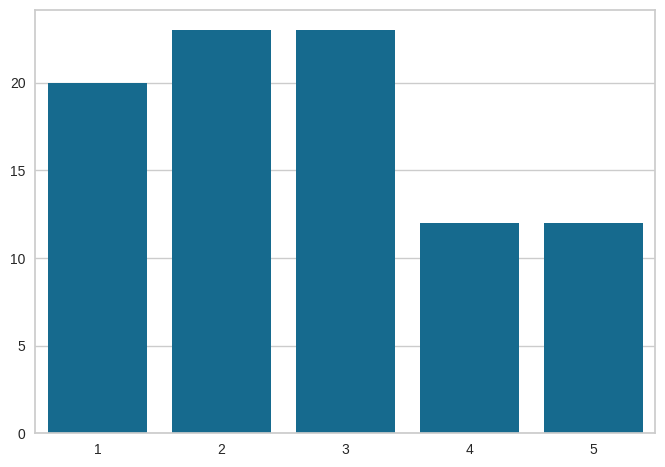

In [93]:
%%capture_img --path "count.png"
counter = collections.Counter(model.labels_+1)
sns.barplot(counter)

In [94]:
X_embedded = TSNE(n_components=3, learning_rate='auto',
                  perplexity=3).fit_transform(model.neural_network.cpu().encoder(dat.cpu()).cpu().detach())

Output saved by creating file at tsne.png.


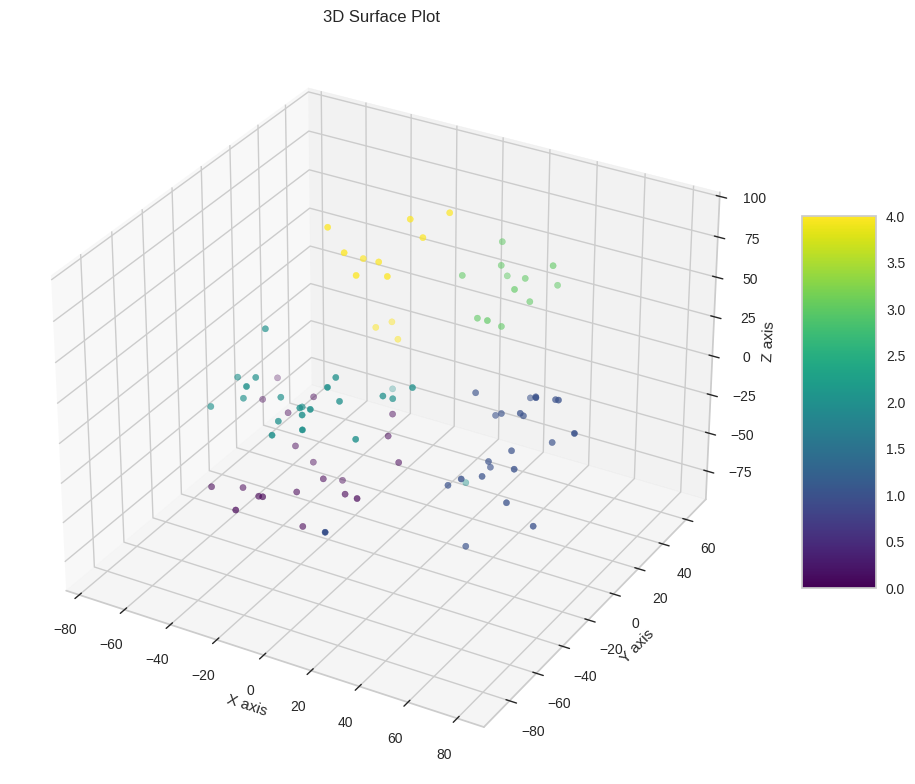

In [95]:
%%capture_img --path "tsne.png"
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Create figure and 3D axis
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot surface
surf = ax.scatter(xs=X_embedded[:,0].reshape(-1,1),ys=X_embedded[:,1].reshape(-1,1),zs=X_embedded[:,2].reshape(-1,1),c=model.labels_ ,cmap='viridis',)

# Add labels and title
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')
ax.set_title('3D Surface Plot')

# Add color bar
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.tight_layout()
plt.show()

In [96]:
df_save=pd.read_csv("dataset_3.csv")
df_save["label"]=model.labels_+1
df_save.to_csv("dec_5_feature.csv")

Output saved by creating file at calinski.png.
Neural network is not fitted yet, will be pretrained.


DEC training: 100%|█████████████| 1000/1000 [00:08<00:00, 114.10it/s, Loss=1.08]
/home/hamed/.local/lib/python3.10/site-packages/sklearn/base.py:1389: ConvergenceWarning: Number of distinct clusters (6) found smaller than n_clusters (7). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
DEC training: 100%|██████████████| 1000/1000 [00:10<00:00, 98.46it/s, Loss=1.06]
/home/hamed/.local/lib/python3.10/site-packages/sklearn/base.py:1389: ConvergenceWarning: Number of distinct clusters (8) found smaller than n_clusters (9). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
DEC training: 100%|█████████████| 1000/1000 [00:09<00:00, 100.05it/s, Loss=1.13]
/home/hamed/.local/lib/python3.10/site-packages/sklearn/base.py:1389: ConvergenceWarning: Number of distinct clusters (9) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
DEC training: 100%|█████

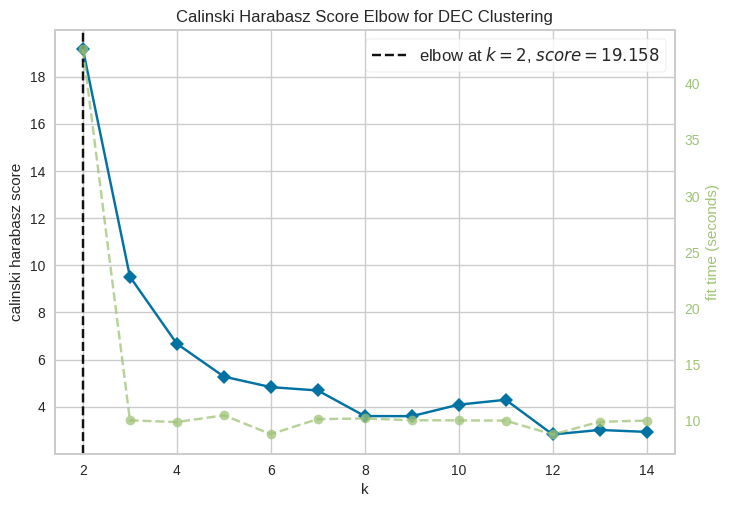

<AxesSubplot: title={'center': 'Calinski Harabasz Score Elbow for DEC Clustering'}, xlabel='k', ylabel='calinski harabasz score'>

In [25]:
%%capture_img --path "calinski.png"
from yellowbrick.cluster import KElbowVisualizer
dat=pd.read_csv("dataset_4.csv")#.to_numpy()
scaler = MinMaxScaler()
dat=torch.tensor(scaler.fit_transform(dat)).float()#[:,temp.argsort()[:60]]
visualizer = KElbowVisualizer(clustpy.deep.DEC(1,pretrain_epochs=2000,clustering_epochs=1000,embedding_size=25), k=(2,15), metric='calinski_harabasz')
visualizer.fit(dat)

visualizer.show()

# IDEC

Output saved by creating file at silhouette.png.
Neural network is not fitted yet, will be pretrained.


DEC training: 100%|████████████| 1000/1000 [00:18<00:00, 54.91it/s, Loss=0.0981]


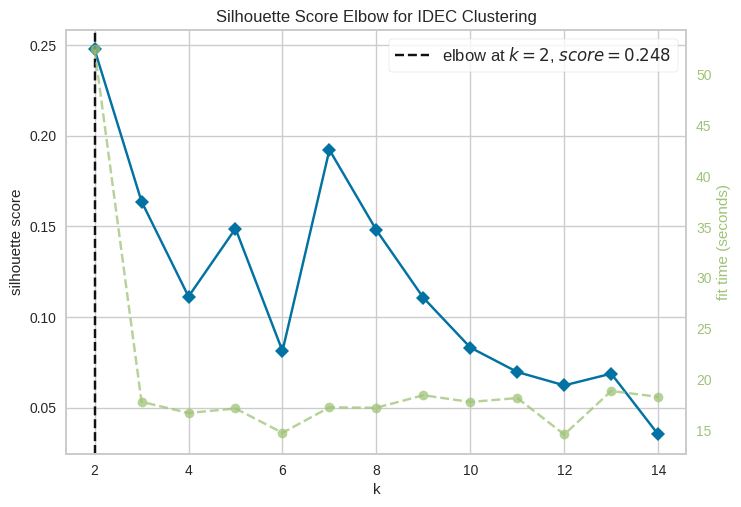

<AxesSubplot: title={'center': 'Silhouette Score Elbow for IDEC Clustering'}, xlabel='k', ylabel='silhouette score'>

In [26]:
%%capture_img --path "silhouette.png"
from yellowbrick.cluster import KElbowVisualizer
dat=pd.read_csv("dataset_4.csv")#.to_numpy()
scaler = MinMaxScaler()
dat=torch.tensor(scaler.fit_transform(dat)).float()#[:,temp.argsort()[:60]]
visualizer = KElbowVisualizer(clustpy.deep.IDEC(1,pretrain_epochs=2000,clustering_epochs=1000), k=(2,15), metric='silhouette')
visualizer.fit(dat)

visualizer.show()

In [27]:
dat=pd.read_csv("dataset_4.csv")#.to_numpy()
scaler = MinMaxScaler()
dat=torch.tensor(scaler.fit_transform(dat)).float()#[:,temp.argsort()[:60]]
model = clustpy.deep.IDEC(2,pretrain_epochs=5000,clustering_epochs=1000)

In [28]:
model.fit(dat)

Neural network is not fitted yet, will be pretrained.


DEC training: 100%|████████████| 1000/1000 [00:16<00:00, 61.12it/s, Loss=0.0303]


IDEC(clustering_epochs=1000, clustering_optimizer_params={'lr': 0.0001},
     initial_clustering_params={}, n_clusters=2,
     neural_network=FeedforwardAutoencoder(
  (encoder): FullyConnectedBlock(
    (block): Sequential(
      (0): Linear(in_features=40, out_features=500, bias=True)
      (1): LeakyReLU(negative_slope=0.01)
      (2): Linear(in_features=500, out_features=500, bias=True)
      (3): LeakyR...
      (1): LeakyReLU(negative_slope=0.01)
      (2): Linear(in_features=2000, out_features=500, bias=True)
      (3): LeakyReLU(negative_slope=0.01)
      (4): Linear(in_features=500, out_features=500, bias=True)
      (5): LeakyReLU(negative_slope=0.01)
      (6): Linear(in_features=500, out_features=40, bias=True)
    )
  )
),
     pretrain_epochs=5000, pretrain_optimizer_params={'lr': 0.001},
     random_state=RandomState(MT19937) at 0x7AAE2C20DE40)

Output saved by creating file at count.png.


<AxesSubplot: >

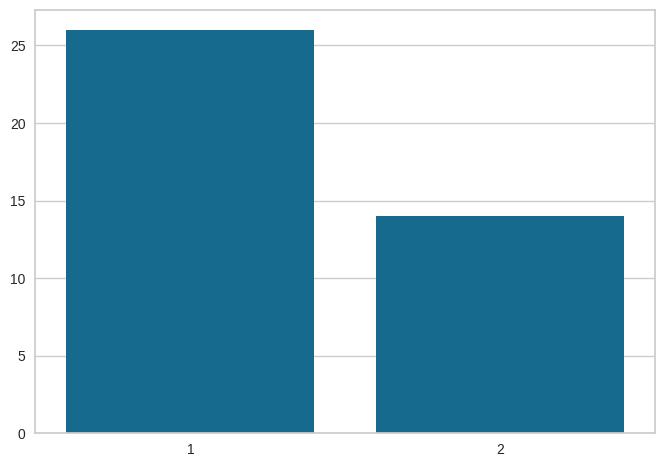

In [29]:
%%capture_img --path "count.png"
counter = collections.Counter(model.labels_+1)
sns.barplot(counter)

In [30]:
X_embedded = TSNE(n_components=3, learning_rate='auto',
                  perplexity=3).fit_transform(model.neural_network.cpu().encoder(dat.cpu()).cpu().detach())

Output saved by creating file at tsne.png.


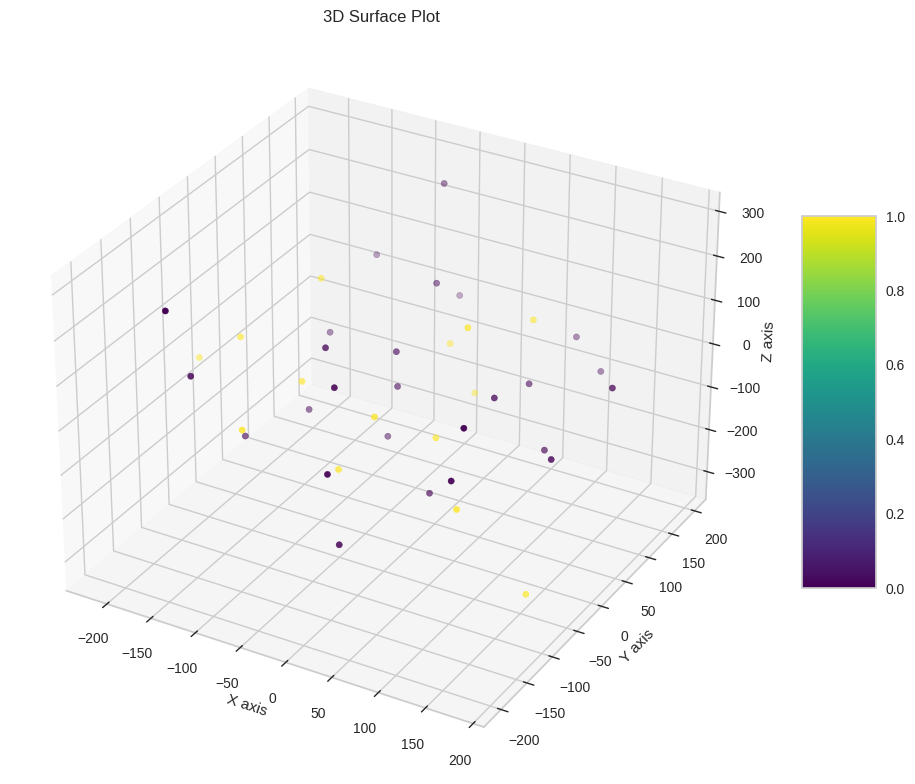

In [31]:
%%capture_img --path "tsne.png"
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Create figure and 3D axis
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot surface
surf = ax.scatter(xs=X_embedded[:,0].reshape(-1,1),ys=X_embedded[:,1].reshape(-1,1),zs=X_embedded[:,2].reshape(-1,1),c=model.labels_ ,cmap='viridis',)

# Add labels and title
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')
ax.set_title('3D Surface Plot')

# Add color bar
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.tight_layout()
plt.show()

In [32]:
df_save=pd.read_csv("dataset_4.csv")
df_save["label"]=model.labels_+1
df_save.to_csv("idec_2_feature.csv")

Output saved by creating file at distortion.png.
Neural network is not fitted yet, will be pretrained.


DEC training: 100%|████████████| 1000/1000 [00:16<00:00, 61.69it/s, Loss=0.0992]


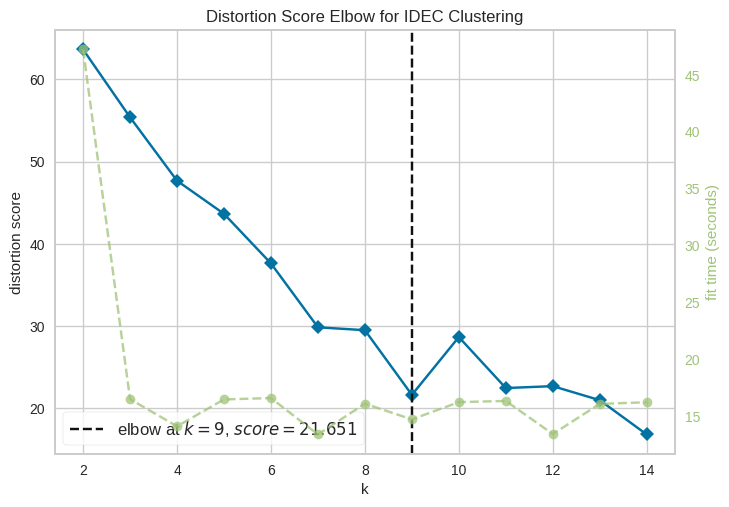

<AxesSubplot: title={'center': 'Distortion Score Elbow for IDEC Clustering'}, xlabel='k', ylabel='distortion score'>

In [33]:
%%capture_img --path "distortion.png"
from yellowbrick.cluster import KElbowVisualizer
dat=pd.read_csv("dataset_4.csv")#.to_numpy()
scaler = MinMaxScaler()
dat=torch.tensor(scaler.fit_transform(dat)).float()#[:,temp.argsort()[:60]]
visualizer = KElbowVisualizer(clustpy.deep.IDEC(1,pretrain_epochs=2000,clustering_epochs=1000), k=(2,15), metric='distortion')
visualizer.fit(dat)

visualizer.show()

In [34]:
dat=pd.read_csv("dataset_4.csv")#.to_numpy()
scaler = MinMaxScaler()
dat=torch.tensor(scaler.fit_transform(dat)).float()#[:,temp.argsort()[:60]]
model = clustpy.deep.IDEC(9,pretrain_epochs=2000,clustering_epochs=1000)

In [35]:
model.fit(dat)

Neural network is not fitted yet, will be pretrained.


DEC training: 100%|█████████████| 1000/1000 [00:16<00:00, 61.01it/s, Loss=0.152]


IDEC(clustering_epochs=1000, clustering_optimizer_params={'lr': 0.0001},
     initial_clustering_params={}, n_clusters=9,
     neural_network=FeedforwardAutoencoder(
  (encoder): FullyConnectedBlock(
    (block): Sequential(
      (0): Linear(in_features=40, out_features=500, bias=True)
      (1): LeakyReLU(negative_slope=0.01)
      (2): Linear(in_features=500, out_features=500, bias=True)
      (3): LeakyR...
      (1): LeakyReLU(negative_slope=0.01)
      (2): Linear(in_features=2000, out_features=500, bias=True)
      (3): LeakyReLU(negative_slope=0.01)
      (4): Linear(in_features=500, out_features=500, bias=True)
      (5): LeakyReLU(negative_slope=0.01)
      (6): Linear(in_features=500, out_features=40, bias=True)
    )
  )
),
     pretrain_epochs=2000, pretrain_optimizer_params={'lr': 0.001},
     random_state=RandomState(MT19937) at 0x7AAE2C20DE40)

Output saved by creating file at count.png.


<AxesSubplot: >

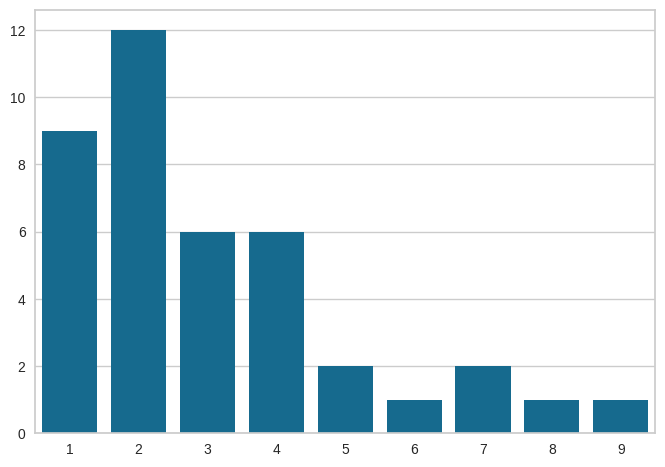

In [36]:
%%capture_img --path "count.png"
counter = collections.Counter(model.labels_+1)
sns.barplot(counter)

In [37]:
X_embedded = TSNE(n_components=3, learning_rate='auto',
                  perplexity=3).fit_transform(model.neural_network.cpu().encoder(dat.cpu()).cpu().detach())

Output saved by creating file at tsne.png.


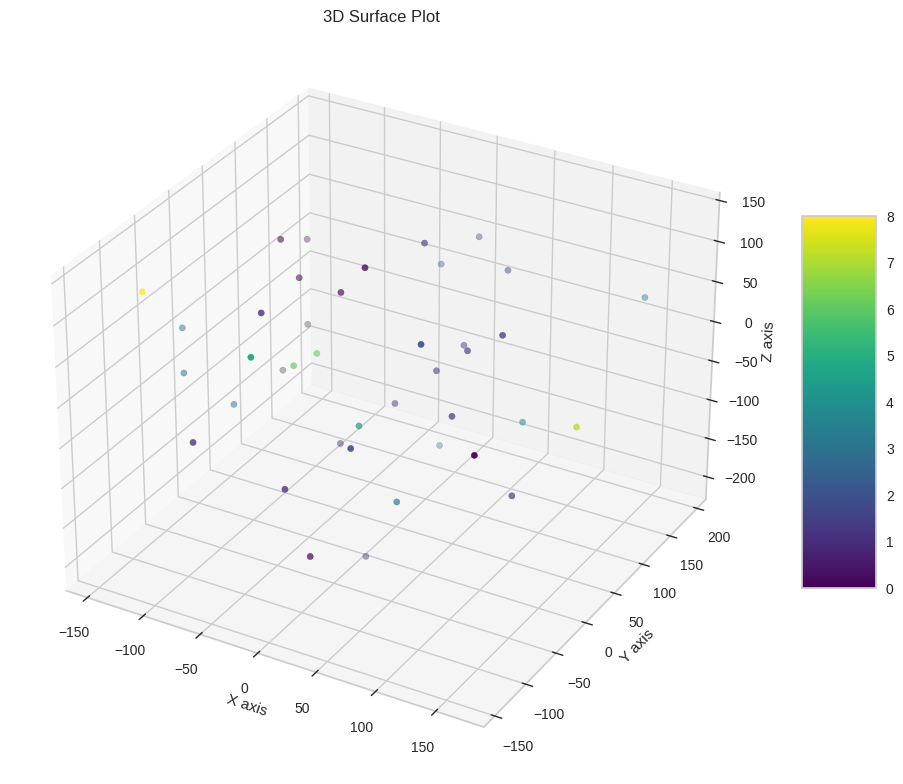

In [38]:
%%capture_img --path "tsne.png"
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Create figure and 3D axis
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot surface
surf = ax.scatter(xs=X_embedded[:,0].reshape(-1,1),ys=X_embedded[:,1].reshape(-1,1),zs=X_embedded[:,2].reshape(-1,1),c=model.labels_ ,cmap='viridis',)

# Add labels and title
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')
ax.set_title('3D Surface Plot')

# Add color bar
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.tight_layout()
plt.show()

In [39]:
df_save=pd.read_csv("dataset_4.csv")
df_save["label"]=model.labels_+1
df_save.to_csv("idec_9_feature.csv")

Output saved by creating file at calinski.png.
Neural network is not fitted yet, will be pretrained.


DEC training: 100%|█████████████| 1000/1000 [00:16<00:00, 61.83it/s, Loss=0.135]


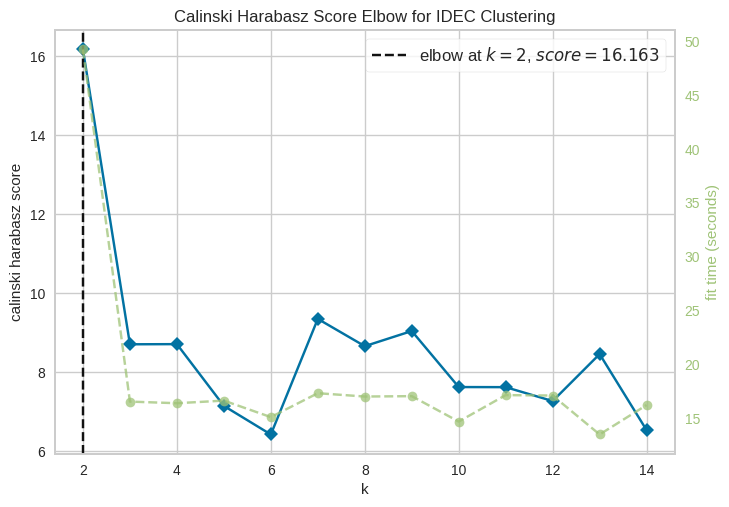

<AxesSubplot: title={'center': 'Calinski Harabasz Score Elbow for IDEC Clustering'}, xlabel='k', ylabel='calinski harabasz score'>

In [40]:
%%capture_img --path "calinski.png"
from yellowbrick.cluster import KElbowVisualizer
dat=pd.read_csv("dataset_4.csv")#.to_numpy()
scaler = MinMaxScaler()
dat=torch.tensor(scaler.fit_transform(dat)).float()#[:,temp.argsort()[:60]]
visualizer = KElbowVisualizer(clustpy.deep.IDEC(1,pretrain_epochs=2000,clustering_epochs=1000), k=(2,15), metric='calinski_harabasz')
visualizer.fit(dat)

visualizer.show()

# DipDeck

In [41]:
dat=pd.read_csv("dataset_4.csv")#.to_numpy()
scaler = StandardScaler()
dat=torch.tensor(scaler.fit_transform(dat)).float()#[:,temp.argsort()[:60]]
model = clustpy.deep.DipDECK(min_n_clusters=2,clustering_epochs=1000,pretrain_epochs=2000)

In [42]:
model.fit(dat.numpy())

Neural network is not fitted yet, will be pretrained.


AE training: 100%|██| 2000/2000 [00:32<00:00, 61.83it/s, Training Loss=3.49e-14]
DipDECK training: 100%|█| 1000/1000 [00:20<00:00, 47.90it/s, n_clusters=2, Loss=

Merge in iteration 1. Merging clusters (0, 1) with dip value 1.0.
Merge in iteration 0. Merging clusters (0, 1) with dip value 1.0.
Merge in iteration 0. Merging clusters (0, 1) with dip value 1.0.
Merge in iteration 0. Merging clusters (0, 1) with dip value 1.0.
Merge in iteration 0. Merging clusters (0, 1) with dip value 1.0.
Merge in iteration 0. Merging clusters (0, 1) with dip value 1.0.
Merge in iteration 0. Merging clusters (0, 1) with dip value 1.0.
Merge in iteration 0. Merging clusters (0, 1) with dip value 1.0.
Merge in iteration 0. Merging clusters (0, 1) with dip value 1.0.
Merge in iteration 0. Merging clusters (0, 1) with dip value 1.0.
Merge in iteration 0. Merging clusters (0, 1) with dip value 1.0.
Merge in iteration 0. Merging clusters (0, 1) with dip value 1.0.
Merge in iteration 0. Merging clusters (0, 1) with dip value 1.0.
Merge in iteration 0. Merging clusters (0, 1) with dip value 1.0.
Merge in iteration 0. Merging clusters (0, 1) with dip value 1.0.
Merge in i

DipDECK(clustering_epochs=1000, clustering_optimizer_params={'lr': 0.0001},
        initial_clustering_params={}, min_n_clusters=2,
        neural_network=FeedforwardAutoencoder(
  (encoder): FullyConnectedBlock(
    (block): Sequential(
      (0): Linear(in_features=40, out_features=500, bias=True)
      (1): LeakyReLU(negative_slope=0.01)
      (2): Linear(in_features=500, out_features=500, bias=True)
      (3)...
      (1): LeakyReLU(negative_slope=0.01)
      (2): Linear(in_features=2000, out_features=500, bias=True)
      (3): LeakyReLU(negative_slope=0.01)
      (4): Linear(in_features=500, out_features=500, bias=True)
      (5): LeakyReLU(negative_slope=0.01)
      (6): Linear(in_features=500, out_features=40, bias=True)
    )
  )
),
        pretrain_epochs=2000, pretrain_optimizer_params={'lr': 0.001},
        random_state=RandomState(MT19937) at 0x7AAE2C20DE40)

Output saved by creating file at count.png.


<AxesSubplot: >

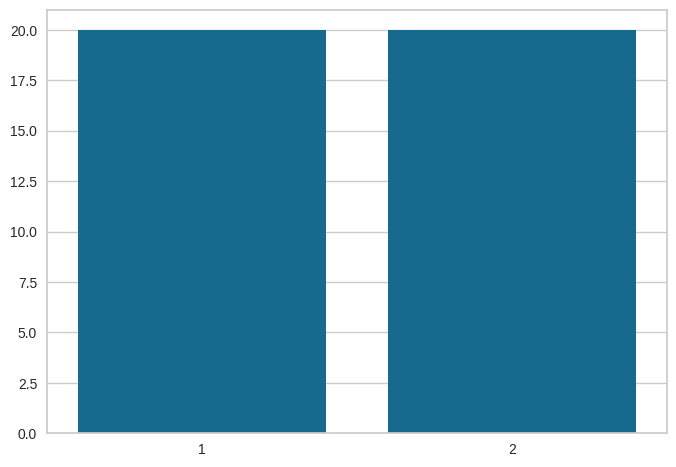

In [43]:
%%capture_img --path "count.png"
counter = collections.Counter(model.labels_+1)
sns.barplot(counter)

In [44]:
X_embedded = TSNE(n_components=3, learning_rate='auto',
                  perplexity=3).fit_transform(model.neural_network.cpu().encoder(dat.cpu()).cpu().detach())

Output saved by creating file at tsne.png.


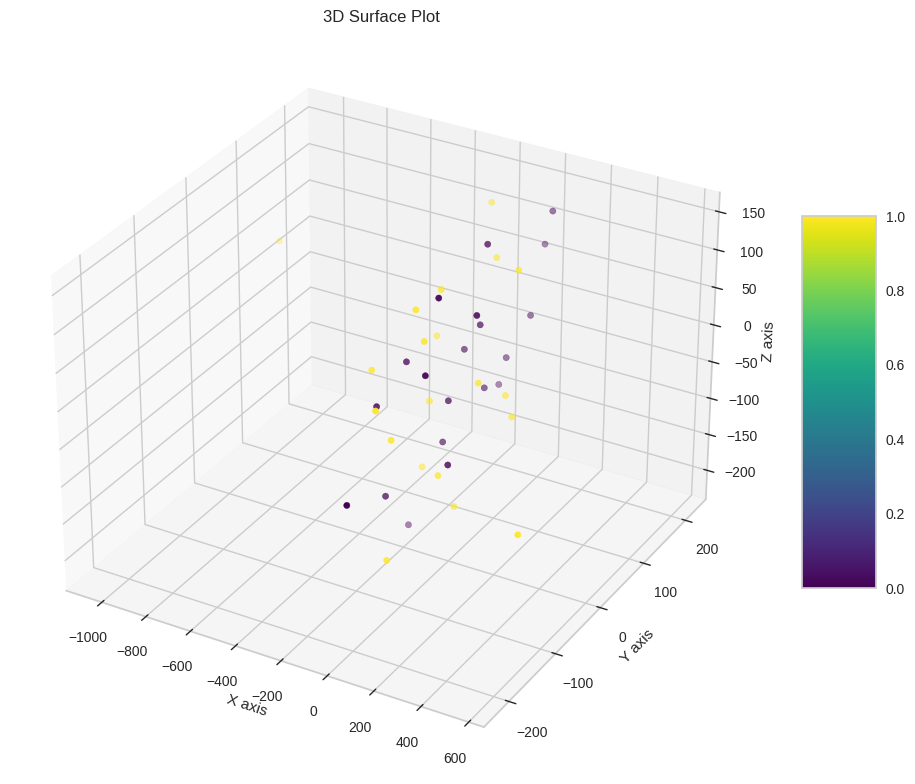

In [45]:
%%capture_img --path "tsne.png"
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Create figure and 3D axis
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot surface
surf = ax.scatter(xs=X_embedded[:,0].reshape(-1,1),ys=X_embedded[:,1].reshape(-1,1),zs=X_embedded[:,2].reshape(-1,1),c=model.labels_ ,cmap='viridis',)

# Add labels and title
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')
ax.set_title('3D Surface Plot')

# Add color bar
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.tight_layout()
plt.show()

In [46]:
df_save=pd.read_csv("dataset_4.csv")
df_save["label"]=model.labels_+1
df_save.to_csv("dipdeck_2_feature.csv")

# DipEncoder

Output saved by creating file at silhouette.png.
Neural network is not fitted yet, will be pretrained.


AE training: 100%|██| 2000/2000 [00:53<00:00, 37.22it/s, Training Loss=3.26e-15]


Setting ssl_loss_weight automatically; set to tensor(1.1278)


DipEncoder training: 100%|███▉| 1000/1001 [00:27<00:00, 36.66it/s, Loss=-0.0711]


Setting ssl_loss_weight automatically; set to tensor(1.1509)


DipEncoder training: 100%|██▉| 1000/1001 [00:24<00:00, 40.01it/s, Loss=4.08e-10]


Setting ssl_loss_weight automatically; set to tensor(1.0536)


DipEncoder training: 100%|███▉| 1000/1001 [00:25<00:00, 39.48it/s, Loss=1.12e-6]


Setting ssl_loss_weight automatically; set to tensor(1.1517)


DipEncoder training: 100%|███▉| 1000/1001 [00:25<00:00, 39.90it/s, Loss=1.41e-5]


Setting ssl_loss_weight automatically; set to tensor(1.1036)


DipEncoder training: 100%|██▉| 1000/1001 [00:26<00:00, 38.06it/s, Loss=-0.00732]


Setting ssl_loss_weight automatically; set to tensor(1.2038)


DipEncoder training: 100%|████▉| 1000/1001 [00:25<00:00, 39.37it/s, Loss=4.3e-7]


Setting ssl_loss_weight automatically; set to tensor(1.0452)


DipEncoder training: 100%|██▉| 1000/1001 [00:25<00:00, 39.15it/s, Loss=3.01e-15]


Setting ssl_loss_weight automatically; set to tensor(1.1593)


DipEncoder training: 100%|███▉| 1000/1001 [00:25<00:00, 38.46it/s, Loss=8.88e-6]


Setting ssl_loss_weight automatically; set to tensor(1.1074)


DipEncoder training: 100%|███▉| 1000/1001 [00:26<00:00, 37.74it/s, Loss=1.21e-7]


Setting ssl_loss_weight automatically; set to tensor(1.0825)


DipEncoder training: 100%|███▉| 1000/1001 [00:27<00:00, 36.66it/s, Loss=2.56e-5]


Setting ssl_loss_weight automatically; set to tensor(1.1015)


DipEncoder training: 100%|██▉| 1000/1001 [00:26<00:00, 38.11it/s, Loss=3.56e-15]


Setting ssl_loss_weight automatically; set to tensor(1.1149)


DipEncoder training: 100%|███▉| 1000/1001 [00:25<00:00, 38.72it/s, Loss=5.38e-6]


Setting ssl_loss_weight automatically; set to tensor(1.2437)


DipEncoder training: 100%|███▉| 1000/1001 [00:26<00:00, 37.46it/s, Loss=8.86e-6]


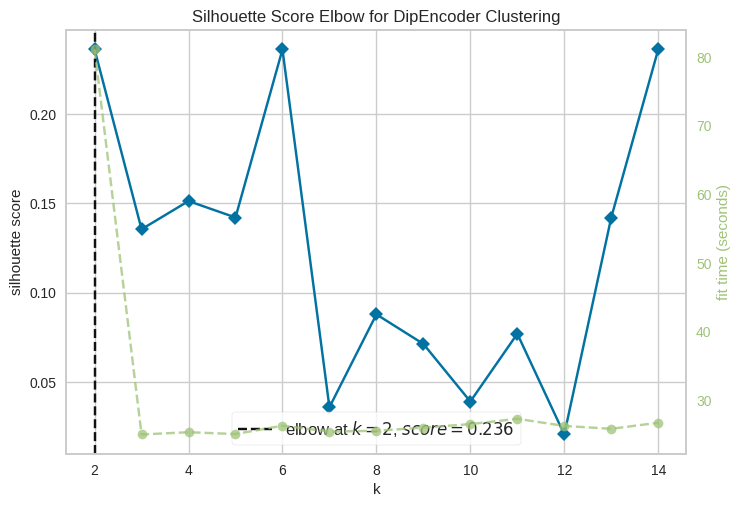

<AxesSubplot: title={'center': 'Silhouette Score Elbow for DipEncoder Clustering'}, xlabel='k', ylabel='silhouette score'>

In [47]:
%%capture_img --path "silhouette.png"
from yellowbrick.cluster import KElbowVisualizer
dat=pd.read_csv("dataset_4.csv")#.to_numpy()
scaler = MinMaxScaler()
dat=torch.tensor(scaler.fit_transform(dat)).float()#[:,temp.argsort()[:60]]
visualizer = KElbowVisualizer(clustpy.deep.DipEncoder(1,pretrain_epochs=2000,clustering_epochs=1000), k=(2,15), metric='silhouette')
visualizer.fit(dat.numpy())

visualizer.show()

Output saved by creating file at distortion.png.
Neural network is not fitted yet, will be pretrained.


AE training: 100%|████| 2000/2000 [00:41<00:00, 47.85it/s, Training Loss=0.0113]


Setting ssl_loss_weight automatically; set to tensor(1.2040)


DipEncoder training: 100%|███▉| 1000/1001 [00:25<00:00, 38.70it/s, Loss=2.81e-5]


Setting ssl_loss_weight automatically; set to tensor(1.0884)


DipEncoder training: 100%|███▉| 1000/1001 [00:31<00:00, 31.72it/s, Loss=2.91e-5]


Setting ssl_loss_weight automatically; set to tensor(1.0878)


DipEncoder training: 100%|███▉| 1000/1001 [00:25<00:00, 39.83it/s, Loss=9.62e-6]


Setting ssl_loss_weight automatically; set to tensor(1.0824)


DipEncoder training: 100%|██▉| 1000/1001 [00:25<00:00, 39.55it/s, Loss=-0.00885]


Setting ssl_loss_weight automatically; set to tensor(1.0344)


DipEncoder training: 100%|██▉| 1000/1001 [00:25<00:00, 38.76it/s, Loss=-0.00705]


Setting ssl_loss_weight automatically; set to tensor(1.1618)


DipEncoder training: 100%|███▉| 1000/1001 [00:25<00:00, 38.60it/s, Loss=1.86e-6]


Setting ssl_loss_weight automatically; set to tensor(1.0308)


DipEncoder training: 100%|██▉| 1000/1001 [00:27<00:00, 36.93it/s, Loss=9.11e-11]


Setting ssl_loss_weight automatically; set to tensor(1.0541)


DipEncoder training: 100%|███▉| 1000/1001 [00:25<00:00, 38.96it/s, Loss=9.43e-6]


Setting ssl_loss_weight automatically; set to tensor(1.1500)


DipEncoder training: 100%|███▉| 1000/1001 [00:26<00:00, 37.20it/s, Loss=2.13e-5]


Setting ssl_loss_weight automatically; set to tensor(1.2465)


DipEncoder training: 100%|██▉| 1000/1001 [00:27<00:00, 36.88it/s, Loss=1.09e-14]


Setting ssl_loss_weight automatically; set to tensor(1.0768)


DipEncoder training: 100%|████▉| 1000/1001 [00:26<00:00, 37.62it/s, Loss=2.3e-6]


Setting ssl_loss_weight automatically; set to tensor(1.1739)


DipEncoder training: 100%|███▉| 1000/1001 [00:25<00:00, 38.60it/s, Loss=1.12e-7]


Setting ssl_loss_weight automatically; set to tensor(1.0896)


DipEncoder training: 100%|██▉| 1000/1001 [00:25<00:00, 38.59it/s, Loss=3.92e-11]


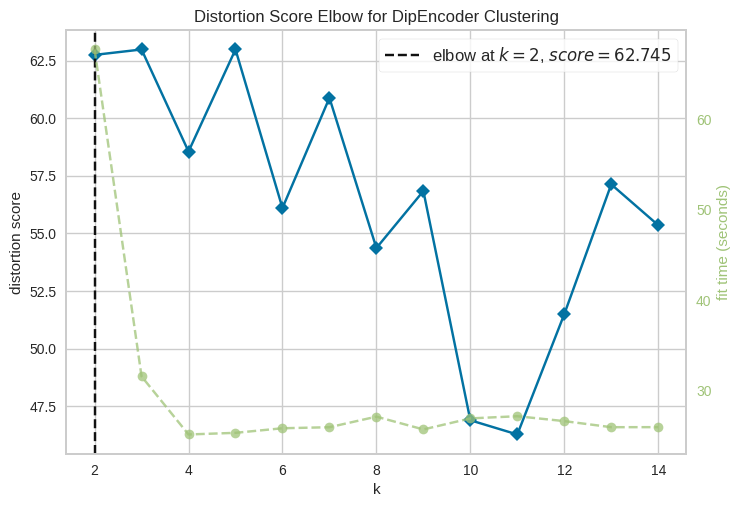

<AxesSubplot: title={'center': 'Distortion Score Elbow for DipEncoder Clustering'}, xlabel='k', ylabel='distortion score'>

In [48]:
%%capture_img --path "distortion.png"
from yellowbrick.cluster import KElbowVisualizer
dat=pd.read_csv("dataset_4.csv")#.to_numpy()
scaler = MinMaxScaler()
dat=torch.tensor(scaler.fit_transform(dat)).float()#[:,temp.argsort()[:60]]
visualizer = KElbowVisualizer(clustpy.deep.DipEncoder(1,pretrain_epochs=2000,clustering_epochs=1000), k=(2,15), metric='distortion')
visualizer.fit(dat.numpy())

visualizer.show()

Output saved by creating file at calinski.png.
Neural network is not fitted yet, will be pretrained.


AE training: 100%|██| 2000/2000 [00:41<00:00, 48.29it/s, Training Loss=1.03e-14]


Setting ssl_loss_weight automatically; set to tensor(1.1395)


DipEncoder training: 100%|████▉| 1000/1001 [00:26<00:00, 37.49it/s, Loss=-0.106]


Setting ssl_loss_weight automatically; set to tensor(1.1693)


DipEncoder training: 100%|███▉| 1000/1001 [00:30<00:00, 32.55it/s, Loss=1.58e-6]


Setting ssl_loss_weight automatically; set to tensor(1.1379)


DipEncoder training: 100%|███▉| 1000/1001 [00:25<00:00, 39.49it/s, Loss=2.74e-7]


Setting ssl_loss_weight automatically; set to tensor(1.1118)


DipEncoder training: 100%|███▉| 1000/1001 [00:31<00:00, 31.68it/s, Loss=1.66e-5]


Setting ssl_loss_weight automatically; set to tensor(1.1525)


DipEncoder training: 100%|███▉| 1000/1001 [00:30<00:00, 32.43it/s, Loss=6.49e-6]


Setting ssl_loss_weight automatically; set to tensor(1.0418)


DipEncoder training: 100%|███▉| 1000/1001 [00:25<00:00, 38.66it/s, Loss=3.52e-9]


Setting ssl_loss_weight automatically; set to tensor(1.0899)


DipEncoder training: 100%|██▉| 1000/1001 [00:32<00:00, 30.84it/s, Loss=5.17e-15]


Setting ssl_loss_weight automatically; set to tensor(1.0520)


DipEncoder training: 100%|███▉| 1000/1001 [00:31<00:00, 31.46it/s, Loss=4.85e-6]


Setting ssl_loss_weight automatically; set to tensor(1.1522)


DipEncoder training: 100%|███▉| 1000/1001 [00:31<00:00, 31.67it/s, Loss=2.06e-6]


Setting ssl_loss_weight automatically; set to tensor(1.0618)


DipEncoder training: 100%|███▉| 1000/1001 [00:30<00:00, 32.63it/s, Loss=6.58e-6]


Setting ssl_loss_weight automatically; set to tensor(1.1290)


DipEncoder training: 100%|███▉| 1000/1001 [00:32<00:00, 31.00it/s, Loss=1.9e-11]


Setting ssl_loss_weight automatically; set to tensor(1.1623)


DipEncoder training: 100%|███▉| 1000/1001 [00:31<00:00, 31.89it/s, Loss=1.57e-8]


Setting ssl_loss_weight automatically; set to tensor(1.1202)


DipEncoder training: 100%|███▉| 1000/1001 [00:30<00:00, 32.43it/s, Loss=3.88e-6]


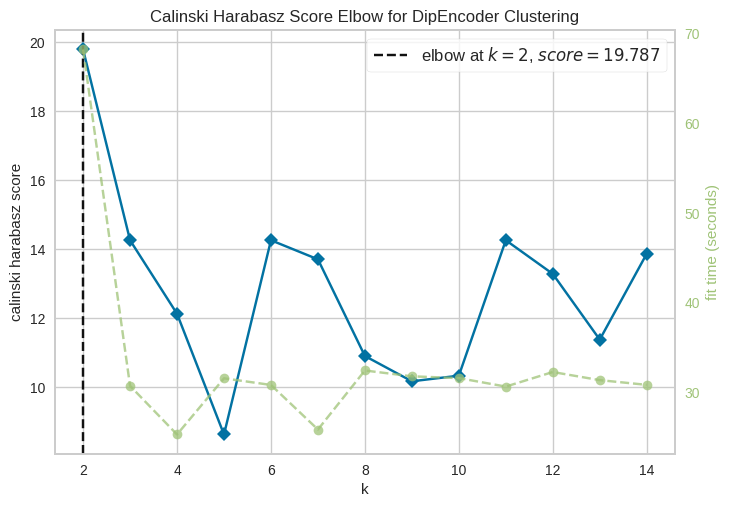

<AxesSubplot: title={'center': 'Calinski Harabasz Score Elbow for DipEncoder Clustering'}, xlabel='k', ylabel='calinski harabasz score'>

In [49]:
%%capture_img --path "calinski.png"
from yellowbrick.cluster import KElbowVisualizer
dat=pd.read_csv("dataset_4.csv")#.to_numpy()
scaler = MinMaxScaler()
dat=torch.tensor(scaler.fit_transform(dat)).float()#[:,temp.argsort()[:60]]
visualizer = KElbowVisualizer(clustpy.deep.DipEncoder(1,pretrain_epochs=2000,clustering_epochs=1000), k=(2,15), metric='calinski_harabasz')
visualizer.fit(dat.numpy())

visualizer.show()

In [50]:
dat=pd.read_csv("dataset_4.csv")#.to_numpy()
scaler = MinMaxScaler()
dat=torch.tensor(scaler.fit_transform(dat)).float()#[:,temp.argsort()[:60]]
model = clustpy.deep.DipEncoder(2,pretrain_epochs=5000,clustering_epochs=1000)

In [51]:
model.fit(dat)

Neural network is not fitted yet, will be pretrained.


AE training: 100%|██| 5000/5000 [01:21<00:00, 60.99it/s, Training Loss=1.09e-11]


Setting ssl_loss_weight automatically; set to tensor(1.1043)


DipEncoder training: 100%|██████▉| 1000/1001 [00:20<00:00, 49.08it/s, Loss=0.01]


DipEncoder(batch_size=50, clustering_epochs=1000,
           clustering_optimizer_params={'lr': 0.0001},
           initial_clustering_params={}, n_clusters=2,
           neural_network=FeedforwardAutoencoder(
  (encoder): FullyConnectedBlock(
    (block): Sequential(
      (0): Linear(in_features=40, out_features=500, bias=True)
      (1): LeakyReLU(negative_slope=0.01)
      (2): Linear(in_features=500, out_features=500,...
      (1): LeakyReLU(negative_slope=0.01)
      (2): Linear(in_features=2000, out_features=500, bias=True)
      (3): LeakyReLU(negative_slope=0.01)
      (4): Linear(in_features=500, out_features=500, bias=True)
      (5): LeakyReLU(negative_slope=0.01)
      (6): Linear(in_features=500, out_features=40, bias=True)
    )
  )
),
           pretrain_epochs=5000, pretrain_optimizer_params={'lr': 0.001},
           random_state=RandomState(MT19937) at 0x7AAE2C20DE40)

Output saved by creating file at count.png.


<AxesSubplot: >

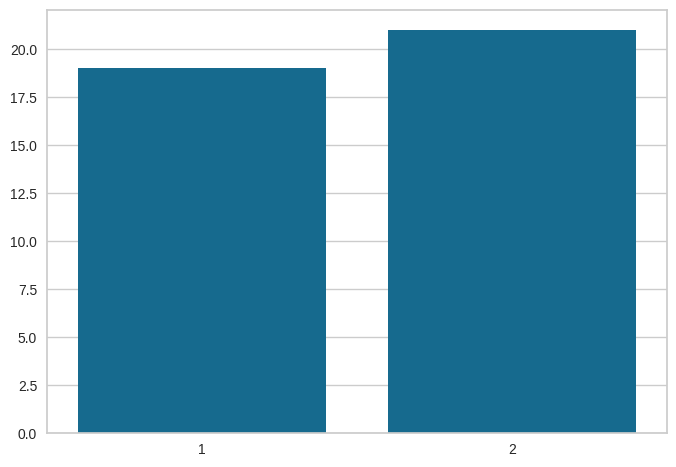

In [52]:
%%capture_img --path "count.png"
counter = collections.Counter(model.labels_+1)
sns.barplot(counter)

In [53]:
X_embedded = TSNE(n_components=3, learning_rate='auto',
                  perplexity=3).fit_transform(model.neural_network.cpu().encoder(dat.cpu()).cpu().detach())

Output saved by creating file at tsne.png.


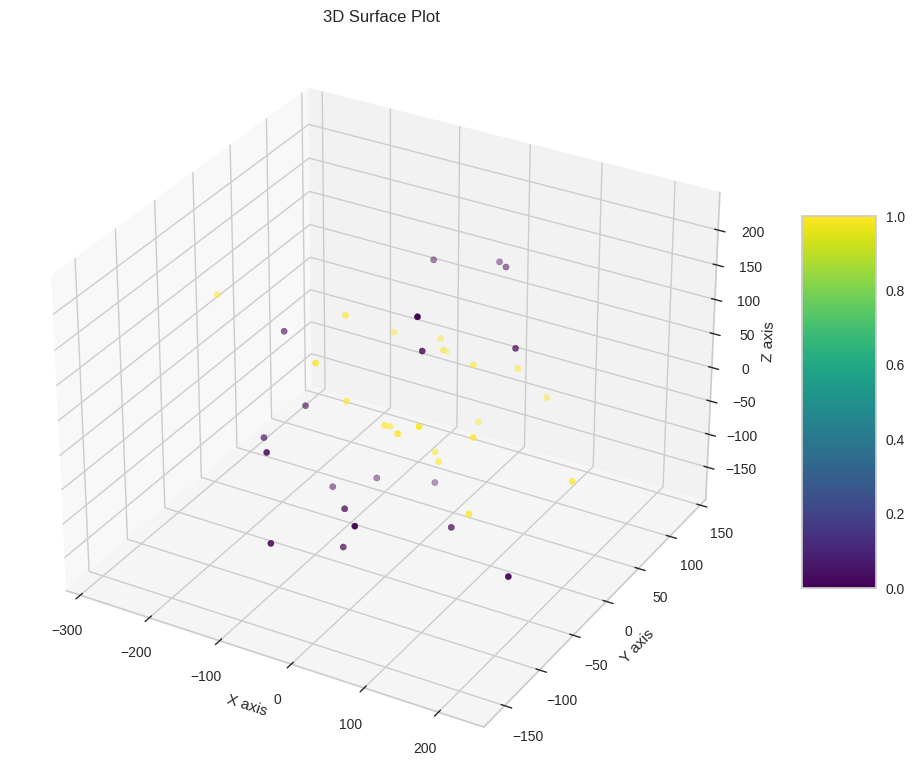

In [54]:
%%capture_img --path "tsne.png"
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Create figure and 3D axis
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot surface
surf = ax.scatter(xs=X_embedded[:,0].reshape(-1,1),ys=X_embedded[:,1].reshape(-1,1),zs=X_embedded[:,2].reshape(-1,1),c=model.labels_ ,cmap='viridis',)

# Add labels and title
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')
ax.set_title('3D Surface Plot')

# Add color bar
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.tight_layout()
plt.show()

In [55]:
df_save=pd.read_csv("dataset_4.csv")
df_save["label"]=model.labels_+1
df_save.to_csv("dipencoder_2_feature.csv")

# N2D

Output saved by creating file at silhouette.png.
Neural network is not fitted yet, will be pretrained.


AE training: 100%|██| 2000/2000 [00:32<00:00, 61.89it/s, Training Loss=3.14e-15]


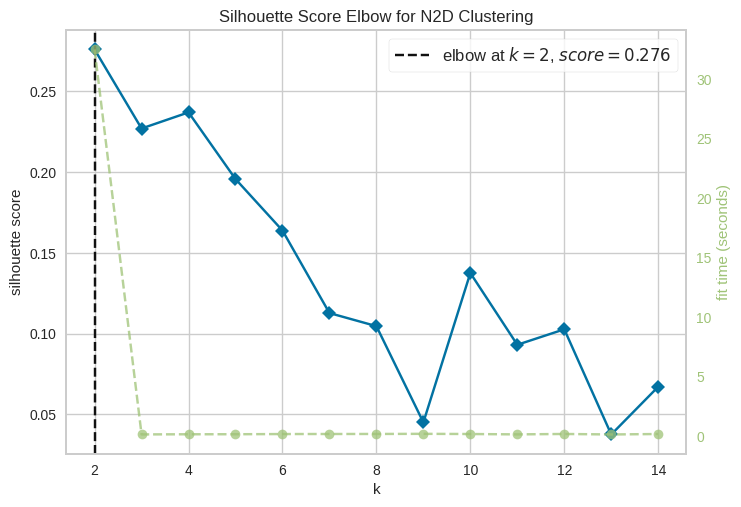

<AxesSubplot: title={'center': 'Silhouette Score Elbow for N2D Clustering'}, xlabel='k', ylabel='silhouette score'>

In [59]:
%%capture_img --path "silhouette.png"
from yellowbrick.cluster import KElbowVisualizer
dat=pd.read_csv("dataset_4.csv")#.to_numpy()
scaler = MinMaxScaler()
dat=torch.tensor(scaler.fit_transform(dat)).float()#[:,temp.argsort()[:60]]
visualizer = KElbowVisualizer(deep.N2D(1,pretrain_epochs=2000), k=(2,15), metric='silhouette')
visualizer.fit(dat)

visualizer.show()

Output saved by creating file at distortion.png.
Neural network is not fitted yet, will be pretrained.


AE training: 100%|██| 5000/5000 [01:21<00:00, 61.72it/s, Training Loss=2.79e-15]


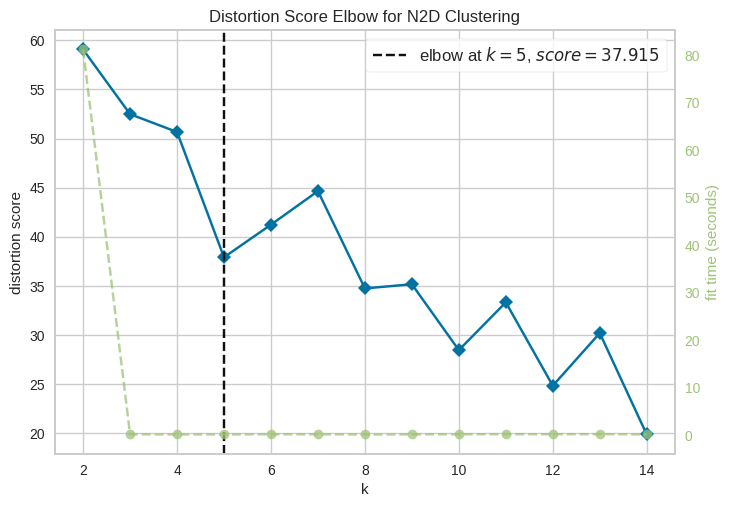

<AxesSubplot: title={'center': 'Distortion Score Elbow for N2D Clustering'}, xlabel='k', ylabel='distortion score'>

In [62]:
%%capture_img --path "distortion.png"
from yellowbrick.cluster import KElbowVisualizer
dat=pd.read_csv("dataset_4.csv")#.to_numpy()
scaler = MinMaxScaler()
dat=torch.tensor(scaler.fit_transform(dat)).float()#[:,temp.argsort()[:60]]
visualizer = KElbowVisualizer(deep.N2D(1,pretrain_epochs=5000), k=(2,15), metric='distortion')
visualizer.fit(dat)

visualizer.show()

Output saved by creating file at calinski.png.
Neural network is not fitted yet, will be pretrained.


AE training: 100%|██| 5000/5000 [01:18<00:00, 63.34it/s, Training Loss=3.33e-15]


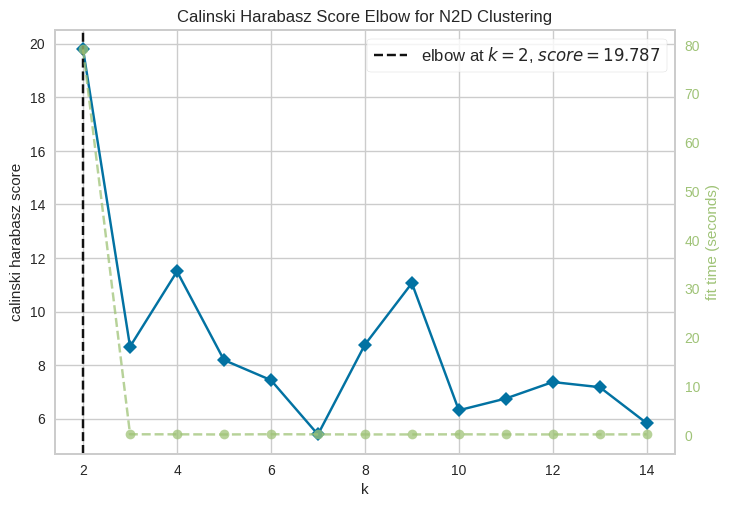

<AxesSubplot: title={'center': 'Calinski Harabasz Score Elbow for N2D Clustering'}, xlabel='k', ylabel='calinski harabasz score'>

In [61]:
%%capture_img --path "calinski.png"
from yellowbrick.cluster import KElbowVisualizer
dat=pd.read_csv("dataset_4.csv")#.to_numpy()
scaler = MinMaxScaler()
dat=torch.tensor(scaler.fit_transform(dat)).float()#[:,temp.argsort()[:60]]
visualizer = KElbowVisualizer(deep.N2D(1,pretrain_epochs=5000), k=(2,15), metric='calinski_harabasz')
visualizer.fit(dat)

visualizer.show()

In [63]:
dat=pd.read_csv("dataset_4.csv")#.to_numpy()
scaler = MinMaxScaler()
dat=torch.tensor(scaler.fit_transform(dat)).float()#[:,temp.argsort()[:60]]
model = clustpy.deep.N2D(2,pretrain_epochs=5000)

In [64]:
model.fit(dat)

Neural network is not fitted yet, will be pretrained.


AE training: 100%|██| 5000/5000 [01:18<00:00, 63.38it/s, Training Loss=1.45e-15]


N2D(manifold_params={'n_components': 2,
                     'random_state': RandomState(MT19937) at 0x7AAE2C20DE40},
    n_clusters=2,
    neural_network=FeedforwardAutoencoder(
  (encoder): FullyConnectedBlock(
    (block): Sequential(
      (0): Linear(in_features=40, out_features=500, bias=True)
      (1): LeakyReLU(negative_slope=0.01)
      (2): Linear(in_features=500, out_features=500, bias=True)
      (3): LeakyReLU(nega...
      (1): LeakyReLU(negative_slope=0.01)
      (2): Linear(in_features=2000, out_features=500, bias=True)
      (3): LeakyReLU(negative_slope=0.01)
      (4): Linear(in_features=500, out_features=500, bias=True)
      (5): LeakyReLU(negative_slope=0.01)
      (6): Linear(in_features=500, out_features=40, bias=True)
    )
  )
),
    pretrain_epochs=5000, pretrain_optimizer_params={'lr': 0.001},
    random_state=RandomState(MT19937) at 0x7AAE2C20DE40)

Output saved by creating file at count.png.


<AxesSubplot: >

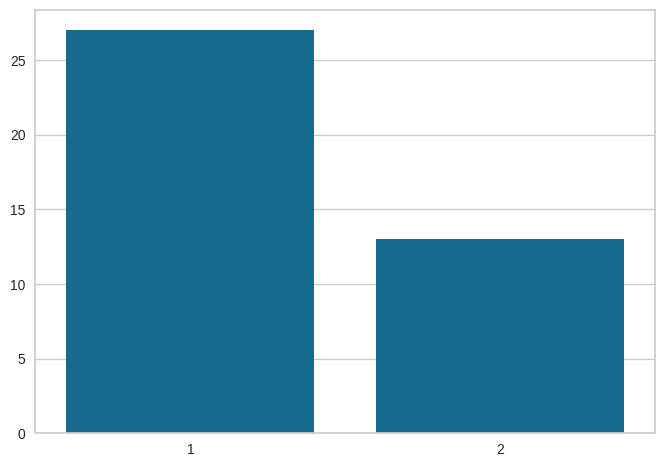

In [65]:
%%capture_img --path "count.png"
counter = collections.Counter(model.labels_+1)
sns.barplot(counter)

In [66]:
X_embedded = TSNE(n_components=3, learning_rate='auto',
                  perplexity=3).fit_transform(model.neural_network.cpu().encoder(dat.cpu()).cpu().detach())

Output saved by creating file at tsne.png.


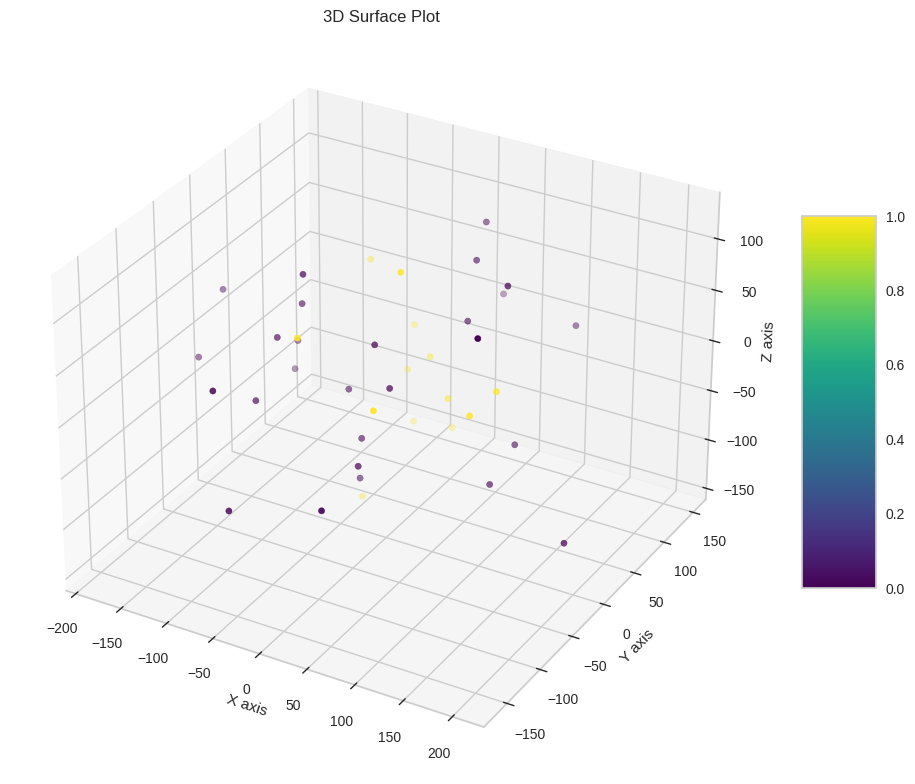

In [67]:
%%capture_img --path "tsne.png"
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Create figure and 3D axis
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot surface
surf = ax.scatter(xs=X_embedded[:,0].reshape(-1,1),ys=X_embedded[:,1].reshape(-1,1),zs=X_embedded[:,2].reshape(-1,1),c=model.labels_ ,cmap='viridis',)

# Add labels and title
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')
ax.set_title('3D Surface Plot')

# Add color bar
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.tight_layout()
plt.show()

In [68]:
df_save=pd.read_csv("dataset_4.csv")
df_save["label"]=model.labels_+1
df_save.to_csv("n2d_2_feature.csv")

In [69]:
dat=pd.read_csv("dataset_4.csv")#.to_numpy()
scaler = MinMaxScaler()
dat=torch.tensor(scaler.fit_transform(dat)).float()#[:,temp.argsort()[:60]]
model = clustpy.deep.N2D(5,pretrain_epochs=5000)

In [70]:
model.fit(dat)

Neural network is not fitted yet, will be pretrained.


AE training: 100%|██| 5000/5000 [01:23<00:00, 59.66it/s, Training Loss=1.32e-15]


N2D(manifold_params={'n_components': 2,
                     'random_state': RandomState(MT19937) at 0x7AAE2C20DE40},
    n_clusters=5,
    neural_network=FeedforwardAutoencoder(
  (encoder): FullyConnectedBlock(
    (block): Sequential(
      (0): Linear(in_features=40, out_features=500, bias=True)
      (1): LeakyReLU(negative_slope=0.01)
      (2): Linear(in_features=500, out_features=500, bias=True)
      (3): LeakyReLU(nega...
      (1): LeakyReLU(negative_slope=0.01)
      (2): Linear(in_features=2000, out_features=500, bias=True)
      (3): LeakyReLU(negative_slope=0.01)
      (4): Linear(in_features=500, out_features=500, bias=True)
      (5): LeakyReLU(negative_slope=0.01)
      (6): Linear(in_features=500, out_features=40, bias=True)
    )
  )
),
    pretrain_epochs=5000, pretrain_optimizer_params={'lr': 0.001},
    random_state=RandomState(MT19937) at 0x7AAE2C20DE40)

Output saved by creating file at count.png.


<AxesSubplot: >

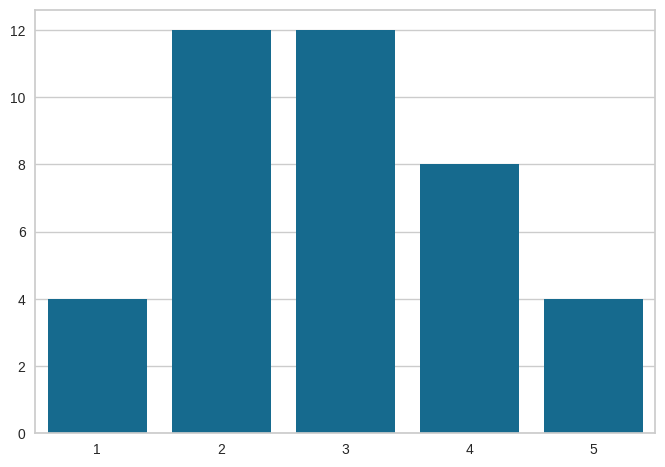

In [71]:
%%capture_img --path "count.png"
counter = collections.Counter(model.labels_+1)
sns.barplot(counter)

In [72]:
X_embedded = TSNE(n_components=3, learning_rate='auto',
                  perplexity=3).fit_transform(model.neural_network.cpu().encoder(dat.cpu()).cpu().detach())

Output saved by creating file at tsne.png.


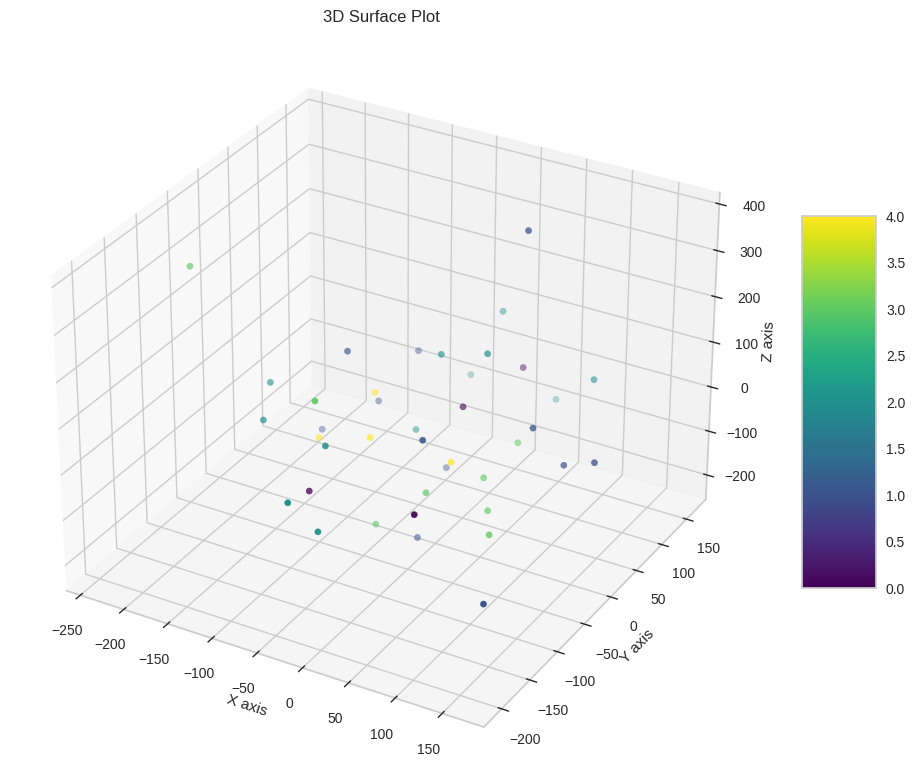

In [73]:
%%capture_img --path "tsne.png"
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Create figure and 3D axis
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot surface
surf = ax.scatter(xs=X_embedded[:,0].reshape(-1,1),ys=X_embedded[:,1].reshape(-1,1),zs=X_embedded[:,2].reshape(-1,1),c=model.labels_ ,cmap='viridis',)

# Add labels and title
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')
ax.set_title('3D Surface Plot')

# Add color bar
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.tight_layout()
plt.show()

In [74]:
df_save=pd.read_csv("dataset_4.csv")
df_save["label"]=model.labels_+1
df_save.to_csv("n2d_5_feature.csv")